# Data Science Final Project

## Student: Micaela Parra

## Abstract

Genetic information is encoded in DNA with a code that uses 4 letters or nucleotides (A-G-T/U-C), which are combined to form different sets of 3 letters (triplets or codons). Each codon encodes an amino acid, a building block that is combined with others to build the proteins involved in cellular and physiological reactions. Of the 64 codons, 61 encode 20 so-called 'standard' amino acids, while the remaining 3 are signals that tell the translation machinery that the protein has finished being synthesized (STOP codons). The genetic code is characterized by being degenerate and redundant; that is, the same amino acid can be encoded by different codons (called synonymous codons). However, synonymous codons are not used with equivalent frequencies, but some are preferred over others to encode a certain amino acid. This phenomenon is called 'codon usage bias', and different species have characteristic biases. It has also been observed that the bias also exists between the different cellular organelles that contain DNA (nucleus, mitochondria, chloroplast, among others), and between genes within the same organism. Recent work has proposed that information on the distribution of codon usage could improve algorithms for searching for de novo coding genes from DNA sequence files. The objective of this project is to build a model capable of predicting the taxonomic group of membership and the type of DNA source from codon usage frequency data. To this end, a dataset with data from nearly 13,000 organisms is available. An exploratory analysis of the data was carried out to collect information that supports or rejects the hypotheses raised. Preliminary results showed that while a single codon pair (or synonymous codons for the same amino acid) do not seem to be sufficiently informative to classify the data into their taxonomic group, different types of organisms present global codon usage patterns that, together, could be capable of making a correct classification. Furthermore, the results showed that future analyses could benefit from combining the attributes 'taxonomic group' and 'DNA type', rather than using them separately. As future perspectives, different statistical and machine learning methods will be used to select the most informative codons and optimize the final model. Knowledge about the distribution of codon usage in different organisms will allow improving methods for searching for coding genes, often limited by simple models based on a few model organisms. Since codons have been selected during evolution, the study of this phenomenon will not only allow the development of new methods for genomic classification and annotation, but also provide information on the origin and natural history of species and their genes.

## Hypothesis

The proposed hypotheses are:
1. Given a set of codon usage frequencies of an organism, it is possible to correctly classify it in its taxonomic group.
2. Given a set of codon usage frequencies of an organism, it is possible to infer its type of DNA source.

## Questions of interest

1. Can codon usage frequencies provide information about the type of organism and DNA it comes from?

2. Are there correlations between the frequencies of use of different codon pairs?
- Are there differences in the correlation patterns between taxonomic groups?
- What is the effect of including taxonomic group and DNA type as variables in the correlations between codons?

3. Are there differences in the frequencies of use between redundant codons (that code for the same amino acid)?

4. How do the data behave in a global analysis of all codons together?
- How does the frequency of use of all codons vary within each taxonomic group?
- Can groups be distinguished when all codons are considered together?

## Aim

The aim of this project is to build a model capable of predicting the taxonomic group of membership and the DNA source type from codon usage frequency data.

## Context

Whole genome sequencing is already a routine practice in the laboratory. The availability of different sequencing platforms, as well as their low cost, have allowed genomic databases to grow exponentially. However, our capacity to estimate the coding potential of genomes does not grow at the same rate. The process of identifying 'real' coding genes from a set of sequences requires multiple steps and often experimental evidence, thus increasing the cost. In recent years, multiple bioinformatics solutions have been proposed using information available in databases, but the biological diversity of organisms often presents challenges and limitations when developing standardized methods. In this context, the possibility of incorporating available information on the bias of synonymous codon usage to facilitate the computational identification of coding genes with 'real' potential to produce proteins arose. In this way, if the codon usage data are characteristic of a type of organism, this information could improve the process of functional characterization of genomes of different origin.

## Problem

The challenge is to determine whether codon usage frequency data alone are capable of correctly classifying different organisms and their source DNA. If so, this knowledge could be used to improve algorithms for detecting coding potential in different types of organisms.

## Analytical context

The following points of the analytical context have been considered:

1. Data collection: The database was downloaded from the UCI Machine Learning Repository.

2. Data preprocessing: Data with null or anomalous values ​​in the columns of interest will be eliminated.

3. Exploratory Data Analysis (EDA): Regressions, descriptive statistics, univariate and multivariate visualizations to identify patterns in the data.

## Dataset: Codon usage

This dataset includes data on the frequency of use of different codons (three-letter DNA sequences) for different taxonomic groups.

The columns potentially interesting for the analysis are:

1. "Kingdom/Taxonomic_group": Group where the species is classified.
2. "DNAtype/Type_ADN": Source of the analyzed DNA (genomic, mitochondrial, chloroplast, etc.).
3. Columns 7-71: Codons with their respective frequencies of use.

## Libraries

In [2]:
# Import libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import numpy as np
from math import pi
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Importing and processing data

Before starting the exploratory analysis of the data, the original dataset was processed to eliminate nulls and duplicates, replacing names and categories to facilitate the interpretation of the results.

In [2]:
# Dataset
# Fuente: http://archive.ics.uci.edu/ml/datasets/Codon+usage

# Load the dataset from the CSV file
data = pd.read_csv('codon_usage.csv', low_memory=False)

In [3]:
# Dataset dimensions
print(data.shape)

(13028, 69)


In [4]:
data.head()

Kingdom  DNAtype  SpeciesID  Ncodons  \
0     vrl        0     100217     1995   
1     vrl        0     100220     1474   
2     vrl        0     100755     4862   
3     vrl        0     100880     1915   
4     vrl        0     100887    22831   

                               SpeciesName      UUU      UUC      UUA  \
0  Epizootic haematopoietic necrosis virus  0.01654  0.01203  0.00050   
1                         Bohle iridovirus  0.02714  0.01357  0.00068   
2             Sweet potato leaf curl virus  0.01974   0.0218  0.01357   
3             Northern cereal mosaic virus  0.01775  0.02245  0.01619   
4           Soil-borne cereal mosaic virus  0.02816  0.01371  0.00767   

       UUG      CUU  ...      CGG      AGA      AGG      GAU      GAC  \
0  0.00351  0.01203  ...  0.00451  0.01303  0.03559  0.01003  0.04612   
1  0.00678  0.00407  ...  0.00136  0.01696  0.03596  0.01221  0.04545   
2  0.01543  0.00782  ...  0.00596  0.01974  0.02489  0.03126  0.02036   
3  0.00992  0.01567  ...  0.00366  0.01410  0.01671  0.03760  0.01932   
4  0.03679  0.01380  ...  0.00604  0.01494  0.01734  0.04148  0.02483   

       GAA      GAG      UAA      UAG      UGA  
0  0.01203  0.04361  0.00251  0.00050  0.00000  
1  0.01560  0.04410  0.00271  0.00068  0.00000  
2  0.02242  0.02468  0.00391  0.00000  0.00144  
3  0.03029  0.03446  0.00261  0.00157  0.00000  
4  0.03359  0.03679  0.00000  0.00044  0.00131  

[5 rows x 69 columns]

### Duplicate check

In [5]:
print(data.shape)
data= data.drop_duplicates()
print(data.shape)

(13028, 69)
(13028, 69)


The dataset does not contain duplicate values.

### Identify cells with non-numeric data

In [6]:
def verificar_no_numericos(columna):
    return ~pd.to_numeric(columna, errors='coerce').notna()

# List of columns to check
columnas = ['UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA', 'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU', 'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC', 'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC', 'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG', 'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG', 'UAA', 'UAG', 'UGA' 
]

# Iterate over columns and check data types
for columna in columnas:
    no_numericos = verificar_no_numericos(data[columna])

    if no_numericos.any():
        filas_no_numericas = data[no_numericos]
        print(f"Filas con datos no numéricos en la columna '{columna}':")
        print(filas_no_numericas)
    else:
        print(f"No hay datos no numéricos en la columna '{columna}'.")

Filas con datos no numéricos en la columna 'UUU':
     Kingdom  DNAtype  SpeciesID  Ncodons  \
486      vrl        0      12440     1238   
5063     bct        0     353569     1698   

                                        SpeciesName                    UUU  \
486                                           Non-A  non-B hepatitis virus   
5063  Salmonella enterica subsp. enterica serovar 4                   12;I   

          UUC     UUA      UUG      CUU  ...      CGG      AGA      AGG  \
486   0.04362  0.0210  0.01292  0.01292  ...  0.00081  0.00323  0.00242   
5063        -  0.0212  0.02356  0.01178  ...  0.03062  0.00118  0.00707   

          GAU      GAC      GAA      GAG      UAA      UAG      UGA  
486   0.00162  0.04443  0.01696  0.02423  0.02262  0.00162  0.00000  
5063  0.00118  0.00000  0.02945  0.02356  0.04476  0.02473  0.00118  

[2 rows x 69 columns]
Filas con datos no numéricos en la columna 'UUC':
     Kingdom  DNAtype  SpeciesID  Ncodons  \
5063     bct        0    

In [7]:
# Discard rows

filas_a_descartar = [486, 5063]
data = data.drop(filas_a_descartar)

In [8]:
# Dataset dimensions
print(data.shape)

(13026, 69)


### Dataset translation and category replacement

The column names and their contents were then replaced with Spanish names:

1. "Kingdom" -> "Grupo_taxonomico"
2. "DNAtype" -> "Tipo_ADN"
3. "SpeciesID" -> "Especies_ID"
4. "Ncodons" -> "N_codones"
5. "SpeciesName" -> "Nombre_especie"

Column (2) was duplicated to create a new column called "Tipo_ADN_ID" to hold the numerical code for each DNA type, while in the new column "Tipo_ADN" the numerical values ​​were replaced with descriptive categories in Spanish.
Also, the categories in column (1) were completed and translated into Spanish. For example, "rod" > "Roedor".

In [9]:
# Duplicate column 2

data.insert(loc=2, column='Tipo_ADN_ID', value=data['DNAtype'])

# Change column names

reemplazar_encabezados = {
    'Kingdom': 'Grupo_taxonomico',
    'SpeciesID': 'Especies_ID',
    'Ncodons': 'N_codones',
    'SpeciesName': 'Nombre_especie',
    'DNAtype': 'Tipo_ADN'
}

data.rename(columns=reemplazar_encabezados, inplace=True)

# Replace column content

lista1 = ['arc','bct','phg','plm','pln','inv','vrt','mam','rod','pri','vrl']

lista2 = ['Archaea','Bacteria','Bacteriófago','Plásmido','Planta','Invertebrado','Vertebrado','Mamífero','Roedor','Primate','Virus']

data['Grupo_taxonomico'] = data['Grupo_taxonomico'].replace(lista1, lista2)

lista3 = [0,1,2,3,4,5,6,7,8,9,10,11,12]

lista4 = ['Genómico', 'Mitocondrial', 'Cloroplasto', 'Cianelo', 'Plástido', 'Nucleomorfo', 'Endosimbionte_secundario', 'Cromoplasto', 'Leucoplasto', 'NA', 'Protoplástido', 'Apicoplasto', 'Kinetoplasto']

data['Tipo_ADN'] = data['Tipo_ADN'].replace(lista3, lista4)

# Identify rows with 'NA' values
filas_con_na = data[data['Tipo_ADN'] == 'NA']

print(filas_con_na)

# Discard rows

filas_a_descartar = [7887, 8361]
data = data.drop(filas_a_descartar)

     Grupo_taxonomico Tipo_ADN  Tipo_ADN_ID  Especies_ID  N_codones  \
7887           Planta       NA            9         4749       1515   
8361           Planta       NA            9        68897       1032   

           Nombre_especie      UUU      UUC      UUA      UUG  ...      CGG  \
7887  x Doritaenopsis sp.   0.0231  0.03036  0.01056  0.02574  ...  0.00924   
8361     x Tritordeum sp.  0.00678  0.02713  0.00097  0.01260  ...  0.00484   

          AGA      AGG      GAU      GAC      GAA      GAG      UAA  UAG  \
7887  0.02508  0.00396  0.03762  0.01452  0.02574  0.06205  0.00000  0.0   
8361  0.00291  0.00581  0.01647  0.03004  0.01453  0.03682  0.00097  0.0   

          UGA  
7887  0.00264  
8361  0.00000  

[2 rows x 70 columns]


In [10]:
data.head()

Grupo_taxonomico  Tipo_ADN  Tipo_ADN_ID  Especies_ID  N_codones  \
0            Virus  Genómico            0       100217       1995   
1            Virus  Genómico            0       100220       1474   
2            Virus  Genómico            0       100755       4862   
3            Virus  Genómico            0       100880       1915   
4            Virus  Genómico            0       100887      22831   

                            Nombre_especie      UUU      UUC      UUA  \
0  Epizootic haematopoietic necrosis virus  0.01654  0.01203  0.00050   
1                         Bohle iridovirus  0.02714  0.01357  0.00068   
2             Sweet potato leaf curl virus  0.01974   0.0218  0.01357   
3             Northern cereal mosaic virus  0.01775  0.02245  0.01619   
4           Soil-borne cereal mosaic virus  0.02816  0.01371  0.00767   

       UUG  ...      CGG      AGA      AGG      GAU      GAC      GAA  \
0  0.00351  ...  0.00451  0.01303  0.03559  0.01003  0.04612  0.01203   
1  0.00678  ...  0.00136  0.01696  0.03596  0.01221  0.04545  0.01560   
2  0.01543  ...  0.00596  0.01974  0.02489  0.03126  0.02036  0.02242   
3  0.00992  ...  0.00366  0.01410  0.01671  0.03760  0.01932  0.03029   
4  0.03679  ...  0.00604  0.01494  0.01734  0.04148  0.02483  0.03359   

       GAG      UAA      UAG      UGA  
0  0.04361  0.00251  0.00050  0.00000  
1  0.04410  0.00271  0.00068  0.00000  
2  0.02468  0.00391  0.00000  0.00144  
3  0.03446  0.00261  0.00157  0.00000  
4  0.03679  0.00000  0.00044  0.00131  

[5 rows x 70 columns]

Two rows with 'NA' in the 'DNA_Type' column were also discarded.

In [11]:
print(data.shape)

(13024, 70)


In [12]:
# value_counts() to count the records in each category
conteo_grupo = data['Grupo_taxonomico'].value_counts().reset_index()
conteo_grupo.columns = ['Grupo_taxonomico', 'Conteo']
conteo_ADN = data['Tipo_ADN'].value_counts().reset_index()
conteo_ADN.columns = ['Tipo_ADN', 'Conteo']

# Print summaries
print("Número de registros según grupo taxonómico:")
print(conteo_grupo)

print("Número de registros según tipo de ADN:")
print(conteo_ADN)

Número de registros según grupo taxonómico:
   Grupo_taxonomico  Conteo
0          Bacteria    2919
1             Virus    2831
2            Planta    2521
3        Vertebrado    2077
4      Invertebrado    1345
5          Mamífero     572
6      Bacteriófago     220
7            Roedor     215
8           Primate     180
9           Archaea     126
10         Plásmido      18
Número de registros según tipo de ADN:
                   Tipo_ADN  Conteo
0                  Genómico    9265
1              Mitocondrial    2899
2               Cloroplasto     816
3                  Plástido      31
4              Kinetoplasto       5
5                   Cianelo       2
6               Nucleomorfo       2
7               Apicoplasto       2
8  Endosimbionte_secundario       1
9               Cromoplasto       1


Final dataset:

In [13]:
# Save new table to a new file
data.to_csv('codon_usage_v2.csv', index=False)

## Exploratory Data Analysis (EDA)

Below are various graphs in order to explore data trends in light of the hypotheses raised.

## 1. How does the frequency of start codon usage (AUG) vary depending on the taxonomic group and the type of source DNA?

### 1.1. Variation in start codon usage frequency (AUG)

The dataset contains data on the frequency of codon usage for different taxonomic groups and DNA types. To begin exploring whether frequencies vary between groups, a codon widely used throughout the tree of life was chosen: the AUG codon, used to initiate protein translation.

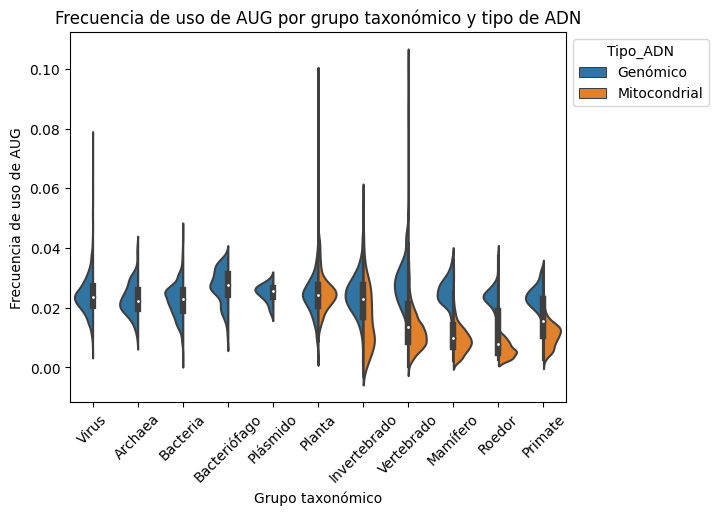

In [14]:
# Filter the dataframe to include only the desired values in 'Tipo_ADN'
filtered_data = data[data['Tipo_ADN'].isin(['Genómico', 'Mitocondrial'])]

# Violin plot with filtered values
ax = sns.violinplot(x='Grupo_taxonomico', y='AUG', hue='Tipo_ADN', data=filtered_data, split = True)

plt.xlabel('Grupo taxonómico')
plt.ylabel('Frecuencia de uso de AUG')

plt.title('Frecuencia de uso de AUG por grupo taxonómico y tipo de ADN')

plt.xticks(rotation=45)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Figure 1: Distribution of AUG codon usage frequencies according to the taxonomic group and the DNA source (genomic or mitochondrial).

These results show that vertebrates (groups 'Mamífero', 'Primate', 'Roedor' y 'Vertebrado') have similar and lower AUG usage frequency means than invertebrates and plants. This supports the hypothesis that informative codons may exist to classify sequences in their taxonomic group based on codon usage frequency.
On the other hand, the means for genomic DNA are similar, while the means for mitochondrial DNA vary between groups, with plants presenting the highest value.

When comparing the frequencies within each group, discriminated by DNA source, it is observed that only plants use the AUG codon with similar frequencies in the genome and in the mitochondria, although genomic DNA presents greater variability. In the rest of the groups, the frequency of AUG use is lower in mitochondrial DNA compared to genomic DNA. This could indicate that mitochondrial DNA preferentially uses another start codon. This result supports the hypothesis that there may be informative codons to predict the source of a DNA sequence.

When the analysis is extended to all DNA types, it is observed that within some groups (e.g. 'Invertebrado'), the frequencies in some DNA types could be significantly different:

In [15]:
# Mean AUG usage frequencies by taxonomic group and DNA type
medias_grupos = data.groupby(['Grupo_taxonomico', 'Tipo_ADN'])['AUG'].mean()

print(medias_grupos)

Grupo_taxonomico  Tipo_ADN                
Archaea           Genómico                    0.022898
Bacteria          Endosimbionte_secundario    0.041140
                  Genómico                    0.022594
                  Plástido                    0.024880
Bacteriófago      Genómico                    0.027300
Invertebrado      Apicoplasto                 0.014790
                  Cloroplasto                 0.012340
                  Genómico                    0.024707
                  Kinetoplasto                0.027774
                  Mitocondrial                0.016231
                  Nucleomorfo                 0.018760
                  Plástido                    0.013527
Mamífero          Genómico                    0.025042
                  Mitocondrial                0.009189
Planta            Cianelo                     0.021415
                  Cloroplasto                 0.019839
                  Cromoplasto                 0.015150
                  Genó

<Figure size 1000x600 with 0 Axes>

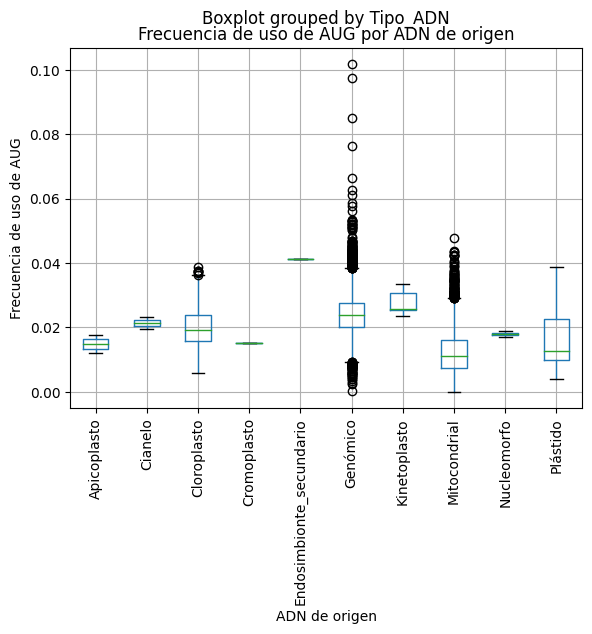

In [16]:
# Figure size
plt.figure(figsize=(10, 6))

# Boxplot with data from column 'AUG', grouping by column 'Tipo_ADN'
data.boxplot(column='AUG', by='Tipo_ADN')

plt.title('Frecuencia de uso de AUG por ADN de origen')

plt.xlabel('ADN de origen')
plt.ylabel('Frecuencia de uso de AUG')

plt.xticks(rotation=90)
plt.show()

Figure 2: Distribution of AUG codon usage frequencies according to the DNA source.

The results show that the median frequencies of AUG use vary depending on the DNA source. The median for genomic DNA was higher than for mitochondrial DNA (as seen in Figure 1), which in turn had the lowest median of all DNA types. The highest median was for DNA from a secondary endosymbiont, but this data should perhaps be discarded as it is the only one of its kind (n=1). Overall, these results support hypothesis 2.

These results were promising to continue with the global analysis with all codons.

## 2. Are there correlations between the frequencies of use of different codon pairs?

As mentioned above, the results for the AUG codon were encouraging, suggesting that further analysis was warranted. To begin with, correlations between all codon pairs were calculated, without discriminating by any explanatory variable.

### 2.1. Correlations between the usage frequencies of all codons

In [17]:
# Correlations between the usage frequencies of all codons

# Extract columns with frequencies
codones = data.iloc[:, 6:70]
#print(codones)

# Calculate pairwise correlations
codones.corr()

UUU       UUC       UUA       UUG       CUU       CUC       CUA  \
UUU  1.000000 -0.354073  0.761443  0.337815  0.312838 -0.433251  0.022282   
UUC -0.354073  1.000000 -0.293131 -0.392019  0.035689  0.601370  0.485327   
UUA  0.761443 -0.293131  1.000000  0.024481  0.255698 -0.364363  0.189228   
UUG  0.337815 -0.392019  0.024481  1.000000 -0.008381 -0.476543 -0.418940   
CUU  0.312838  0.035689  0.255698 -0.008381  1.000000  0.190493  0.362008   
..        ...       ...       ...       ...       ...       ...       ...   
GAA  0.154083 -0.464546  0.188331  0.315465 -0.028006 -0.532887 -0.286817   
GAG -0.452576 -0.079175 -0.577721  0.115123 -0.430838  0.013341 -0.592619   
UAA  0.161904 -0.014784  0.263068 -0.131157  0.168437  0.014531  0.237389   
UAG  0.008273 -0.046378  0.009472  0.053642  0.010339 -0.009272 -0.031237   
UGA  0.154562  0.441308  0.331437 -0.468197  0.422578  0.469286  0.842418   

          CUG       AUU       AUC  ...       CGG       AGA       AGG  \
UUU -0.488971  0.722357 -0.424844  ... -0.343613  0.303701 -0.104955   
UUC  0.152302 -0.220607  0.739861  ...  0.023951 -0.469525 -0.195664   
UUA -0.552014  0.821588 -0.294491  ... -0.396608  0.231940 -0.273744   
UUG -0.145956  0.032807 -0.493543  ... -0.036998  0.396119  0.288063   
CUU -0.418990  0.434971 -0.028238  ... -0.369103 -0.083298 -0.177272   
..        ...       ...       ...  ...       ...       ...       ...   
GAA -0.291134  0.175428 -0.426183  ... -0.228086  0.476883  0.046396   
GAG  0.561773 -0.636479 -0.117469  ...  0.524443  0.056753  0.477772   
UAA -0.229207  0.263251  0.027221  ... -0.251578  0.020188 -0.157454   
UAG -0.025874 -0.015868 -0.046287  ... -0.001641  0.050179  0.085670   
UGA -0.244799  0.426921  0.536262  ... -0.282882 -0.424735 -0.452090   

          GAU       GAC       GAA       GAG       UAA       UAG       UGA  
UUU  0.163568 -0.598969  0.154083 -0.452576  0.161904  0.008273  0.154562  
UUC -0.569674  0.198718 -0.464546 -0.079175 -0.014784 -0.046378  0.441308  
UUA  0.081034 -0.633754  0.188331 -0.577721  0.263068  0.009472  0.331437  
UUG  0.475902 -0.159603  0.315465  0.115123 -0.131157  0.053642 -0.468197  
CUU -0.139880 -0.507632 -0.028006 -0.430838  0.168437  0.010339  0.422578  
..        ...       ...       ...       ...       ...       ...       ...  
GAA  0.684606 -0.218428  1.000000 -0.085102  0.077870 -0.019809 -0.402056  
GAG  0.120084  0.673310 -0.085102  1.000000 -0.289538  0.004241 -0.582658  
UAA -0.067367 -0.292166  0.077870 -0.289538  1.000000  0.136407  0.276966  
UAG -0.010043 -0.053814 -0.019809  0.004241  0.136407  1.000000  0.006952  
UGA -0.631348 -0.360245 -0.402056 -0.582658  0.276966  0.006952  1.000000  

[64 rows x 64 columns]

<Axes: >

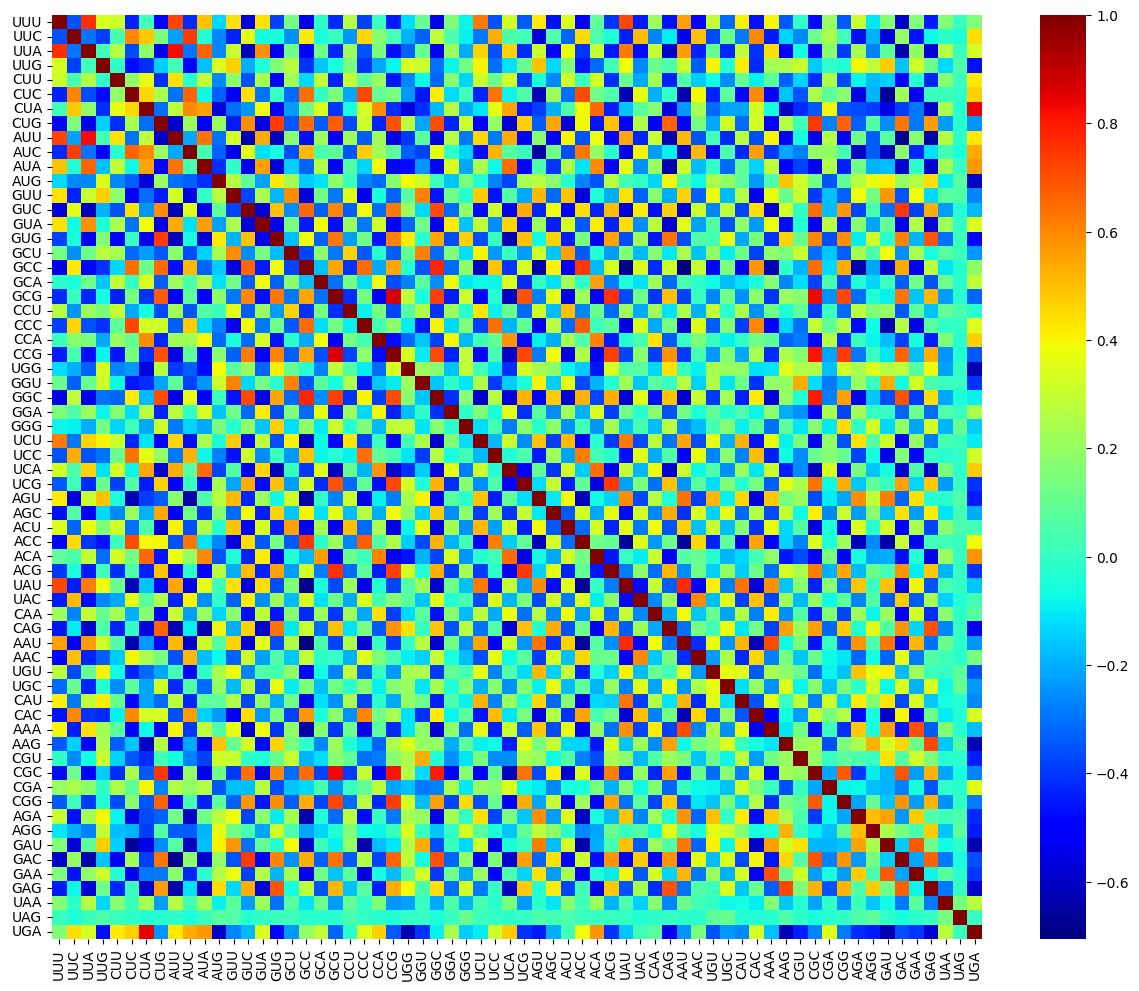

In [16]:
plt.figure(figsize=(15,12))
sns.heatmap(data=codones.corr(), cmap='jet')

Figure 3: Heatmap showing the correlation values between all codon pairs.

Figure 3 shows that the correlation values ​​between codons are variable.

### 2.2. Correlations between codons according to taxonomic group

The next question to be answered was whether there were differences between codon correlation values ​​according to taxonomic group. To answer this question, two different taxonomic groups within the large group of animals were chosen to explore the variations.

In [18]:
# Filter the dataset by category "Vertebrado"
vertebrado = data[data['Grupo_taxonomico'] == 'Vertebrado']

# Filter the dataset by category "Invertebrado"
invertebrado = data[data['Grupo_taxonomico'] == 'Invertebrado']

In [19]:
codones_vert = vertebrado.iloc[:, 6:70]
codones_invert = invertebrado.iloc[:, 6:70]
#print(codones_vert)
#print(codones_invert)

# Calculate pairwise correlations
codones_vert.corr()
codones_invert.corr()

UUU       UUC       UUA       UUG       CUU       CUC       CUA  \
UUU  1.000000 -0.539504  0.847856  0.269529  0.247609 -0.593050  0.291452   
UUC -0.539504  1.000000 -0.551950 -0.160373 -0.039311  0.656777 -0.000323   
UUA  0.847856 -0.551950  1.000000 -0.020510  0.157347 -0.631759  0.309128   
UUG  0.269529 -0.160373 -0.020510  1.000000  0.102665 -0.191830 -0.055086   
CUU  0.247609 -0.039311  0.157347  0.102665  1.000000  0.001881  0.427499   
..        ...       ...       ...       ...       ...       ...       ...   
GAA -0.367341 -0.056549 -0.263630 -0.014745  0.014255 -0.077450 -0.217734   
GAG -0.612020  0.426040 -0.696953 -0.078717 -0.304744  0.596553 -0.398350   
UAA  0.107881 -0.127599  0.149352 -0.051272  0.043551 -0.137418  0.124318   
UAG  0.056058 -0.016690  0.010910  0.146174  0.111476  0.020859  0.032315   
UGA  0.657440 -0.358584  0.697890 -0.096253  0.197657 -0.386588  0.563314   

          CUG       AUU       AUC  ...       CGG       AGA       AGG  \
UUU -0.554124  0.774136 -0.580438  ... -0.315467  0.286946 -0.178280   
UUC  0.472335 -0.500470  0.652831  ...  0.226234 -0.296135  0.160819   
UUA -0.627183  0.882487 -0.571683  ... -0.385624  0.368236 -0.305480   
UUG -0.122700 -0.064431 -0.212801  ...  0.013043 -0.058262  0.194100   
CUU -0.321209  0.192375 -0.127029  ... -0.182036  0.211746  0.010459   
..        ...       ...       ...  ...       ...       ...       ...   
GAA -0.188840 -0.190070 -0.079360  ... -0.190005  0.220457 -0.059781   
GAG  0.715777 -0.668113  0.545545  ...  0.465279 -0.445100  0.319700   
UAA -0.212216  0.169924 -0.098513  ... -0.223712  0.332451 -0.123261   
UAG -0.059009  0.000242 -0.052266  ... -0.017568  0.184915  0.072052   
UGA -0.454996  0.718981 -0.331373  ... -0.274361  0.342243 -0.215242   

          GAU       GAC       GAA       GAG       UAA       UAG       UGA  
UUU -0.351774 -0.727728 -0.367341 -0.612020  0.107881  0.056058  0.657440  
UUC -0.042424  0.606500 -0.056549  0.426040 -0.127599 -0.016690 -0.358584  
UUA -0.334586 -0.762470 -0.263630 -0.696953  0.149352  0.010910  0.697890  
UUG  0.060528 -0.203710 -0.014745 -0.078717 -0.051272  0.146174 -0.096253  
CUU -0.089748 -0.285690  0.014255 -0.304744  0.043551  0.111476  0.197657  
..        ...       ...       ...       ...       ...       ...       ...  
GAA  0.680998  0.091506  1.000000 -0.007453  0.025502 -0.048306 -0.373027  
GAG  0.103567  0.740623 -0.007453  1.000000 -0.186046 -0.049355 -0.519451  
UAA  0.012867 -0.233146  0.025502 -0.186046  1.000000  0.583221  0.253231  
UAG  0.018891 -0.093914 -0.048306 -0.049355  0.583221  1.000000  0.014611  
UGA -0.434020 -0.605710 -0.373027 -0.519451  0.253231  0.014611  1.000000  

[64 rows x 64 columns]

<Axes: >

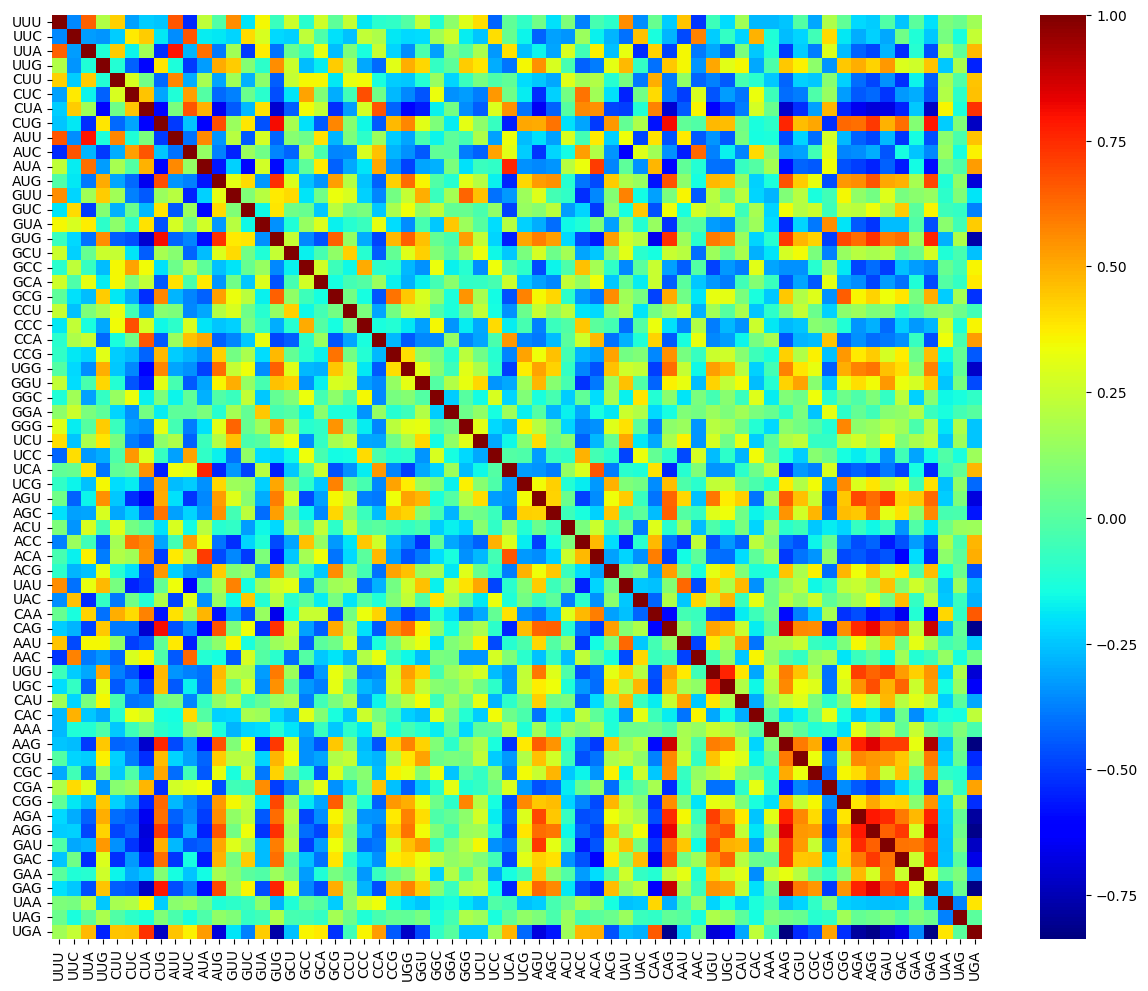

In [20]:
plt.figure(figsize=(15,12))
sns.heatmap(data=codones_vert.corr(), cmap='jet')

Figure 4: Heatmap showing the correlation values between all codon pairs in the Vertebrates group.

<Axes: >

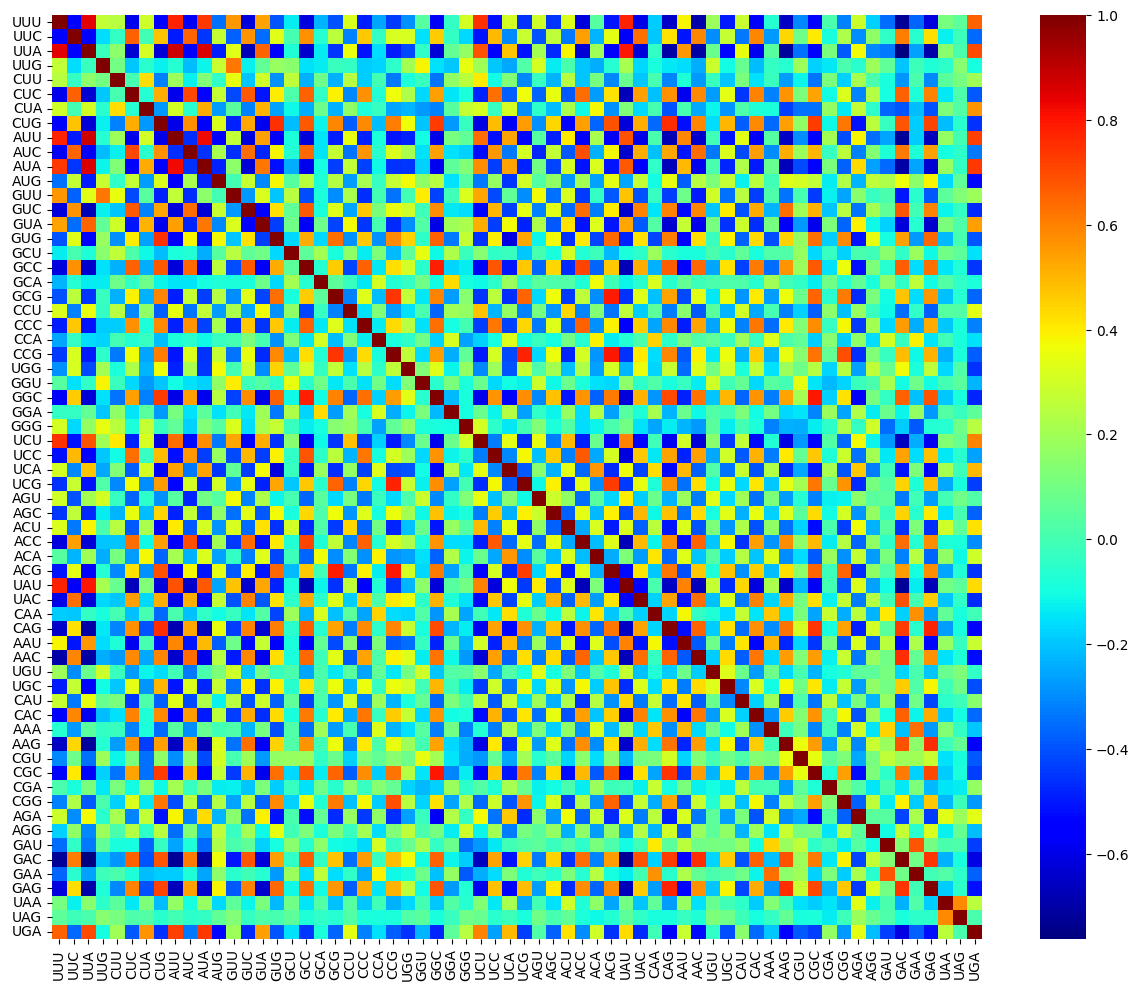

In [21]:
plt.figure(figsize=(15,12))
sns.heatmap(data=codones_invert.corr(), cmap='jet')

Figure 5: Heatmap showing the correlation values between all codon pairs in the Invertebrates group.

When comparing correlation values ​​between vertebrates and invertebrates, differences are observed. For example, a positive correlation is observed between the codons CGG, AGA, AGG, GAU, GAC and GAG in vertebrates, which is absent or lower in invertebrates. This indicates that these codons could be informative for classifying a sequence between these two groups.

## 3. What is the effect of including taxonomic group and DNA type as variables in codon correlations?

After the global analysis of correlations, specific cases were analyzed by calculating linear models with different variables to explore the impact of the inclusion of the explanatory variables "grupo taxonómico" and "tipo de ADN".

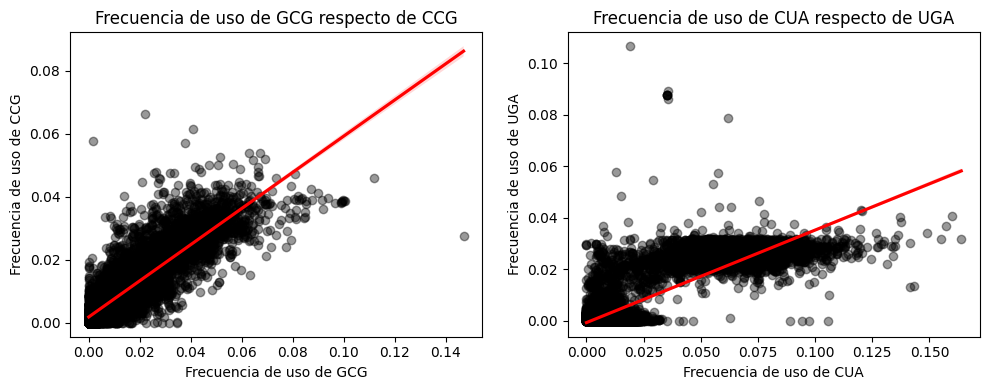

In [22]:
# Figure size, number and distribution of panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Scatter plot 1

ax1.set_title('Frecuencia de uso de GCG respecto de CCG')
sns.regplot(data=data, x='GCG', y='CCG', ax=ax1, scatter_kws = {"color": "black", "alpha": 0.4}, line_kws = {"color": "red"})

ax1.set_xlabel('Frecuencia de uso de GCG')
ax1.set_ylabel('Frecuencia de uso de CCG')

# Scatter plot 2

ax2.set_title('Frecuencia de uso de CUA respecto de UGA')
sns.regplot(data=data, x='CUA', y='UGA', ax=ax2, scatter_kws = {"color": "black", "alpha": 0.4}, line_kws = {"color": "red"})

ax2.set_xlabel('Frecuencia de uso de CUA')
ax2.set_ylabel('Frecuencia de uso de UGA')

plt.tight_layout()
plt.show()

Figure 6: Scatter plots showing trends between codon pairs with high correlation values.

Figure 6 shows that the codon usage frequencies CCG and GCG are positively related with a high correlation value (0.87 according to the calculated matrix). CUA and UGA also presented a high correlation value (0.84), but the scatter plot shows that the linear function might not be the best fit to the data.

In [23]:
model1 = 'CCG~GCG'
lm1 = sm.ols(formula = model1, data = data).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    CCG   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 4.036e+04
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:16:21   Log-Likelihood:                 52115.
No. Observations:               13024   AIC:                        -1.042e+05
Df Residuals:                   13022   BIC:                        -1.042e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0019   5.12e-05     36.779      0.0

In [24]:
model2 = 'CCG~Grupo_taxonomico+GCG'
lm2 = sm.ols(formula = model2, data = data).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    CCG   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     3735.
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:16:22   Log-Likelihood:                 52206.
No. Observations:               13024   AIC:                        -1.044e+05
Df Residuals:                   13012   BIC:                        -1.043e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [25]:
model3 = 'CCG~Tipo_ADN+GCG'
lm3 = sm.ols(formula = model3, data = data).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    CCG   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     4170.
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:16:22   Log-Likelihood:                 52279.
No. Observations:               13024   AIC:                        -1.045e+05
Df Residuals:                   13013   BIC:                        -1.045e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [26]:
model4 = 'UGA~CUA'
lm4 = sm.ols(formula = model4, data = data).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    UGA   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                 3.183e+04
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:16:25   Log-Likelihood:                 49109.
No. Observations:               13024   AIC:                        -9.821e+04
Df Residuals:                   13022   BIC:                        -9.820e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0007   6.21e-05    -10.705      0.0

In [27]:
model5 = 'UGA~Grupo_taxonomico+CUA'
lm5 = sm.ols(formula = model5, data = data).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    UGA   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     4089.
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:16:27   Log-Likelihood:                 50787.
No. Observations:               13024   AIC:                        -1.016e+05
Df Residuals:                   13012   BIC:                        -1.015e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [28]:
model6 = 'UGA~Tipo_ADN+CUA'
lm6 = sm.ols(formula = model6, data = data).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    UGA   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     9231.
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:16:32   Log-Likelihood:                 54673.
No. Observations:               13024   AIC:                        -1.093e+05
Df Residuals:                   13013   BIC:                        -1.092e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


When calculating regression models for the pairs presented in Figure 6, it is observed that the r-squared values are greater than 70%, and their value increases when the variables "grupo_taxonómico" or "tipo_ADN" are considered in the model. However, when considering the DNA type as a variable, the p-values of the intercept are > 0.05; that is, there is not enough evidence to reject the null hypothesis.
The p-values by category varied according to the case. For example, there is evidence of a linear relationship for the Roedor category both in model 2 (CCG based on Grupo_taxonomico+GCG) and in model 5 (UGA based on Grupo_taxonomico+CUA), while for the DNA type categories only mitochondrial and kinetoplast presented significant values when the model 'UGA based on Tipo_ADN+CUA' was used.
These results support the idea that each case is particular depending on the categories considered.

## 4. Are there differences in usage frequencies between redundant codons (encoding the same amino acid)?

The differences for codons encoding a single type of amino acid were then explored. Alanine was taken as an example, encoded by 4 different codons.

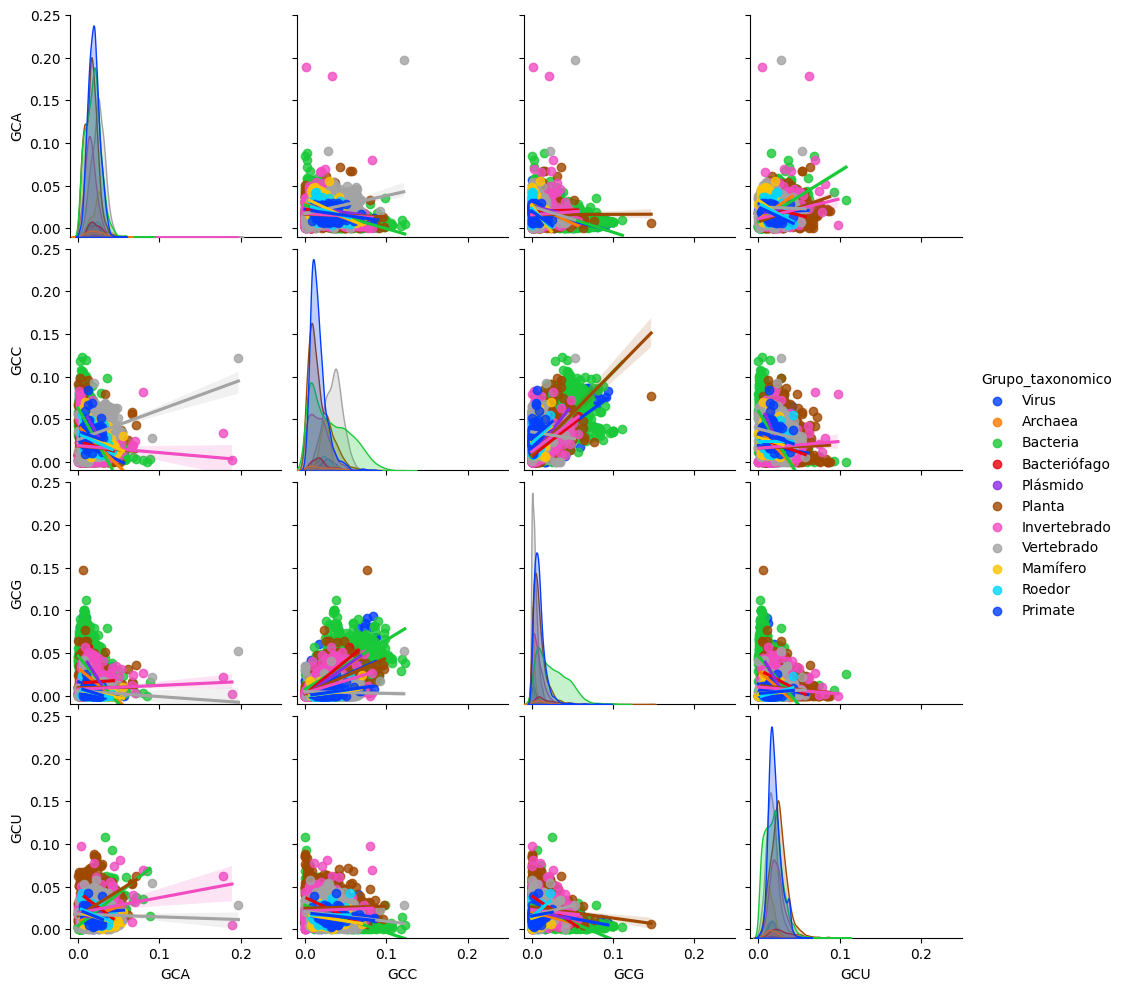

In [29]:
# Select the codons that encode the amino acid alanine
alanina = codones.loc[:, ['GCA', 'GCC', 'GCG', 'GCU']]

# Concatenate the variables
df = pd.concat([data["Grupo_taxonomico"], alanina], axis=1)

# Set color palette
colors = sns.color_palette("bright", 11)

# Create scatter plots + trend lines for all combinations
plot = sns.pairplot(df, hue="Grupo_taxonomico", kind="reg", palette=colors)

# Use the same scale in the graphs

#plot.axes[0,0].set_xlim((0, 0.20))
#plot.axes[0,0].set_ylim((0, 0.20))

lim = (0, 1, 2, 3)

for i, j in zip(lim, lim):
    plot.axes[i,j].set_xlim((-0.01, 0.25))
    plot.axes[i,j].set_ylim((-0.01, 0.25))

plt.show()

Figure 7: Scatter plots between all codon pairs encoding the amino acid alanine. The color legend indicates the taxonomic group of the organism.

The diagonal shows that the groups are superimposed, meaning that these codons by themselves are not sufficiently informative to correctly separate by taxonomic group. However, the greatest differences were observed for the GCC codon, with more separated and asymmetrical distributions with respect to the other pairs.
There do not seem to be significant relationships between the frequencies of use of the alanine codons, with the exception of GCC and GCG, where a positive relationship is observed between the variables for several groups (por ej, Planta, Bacteria, Archaea, Bacteriófago).

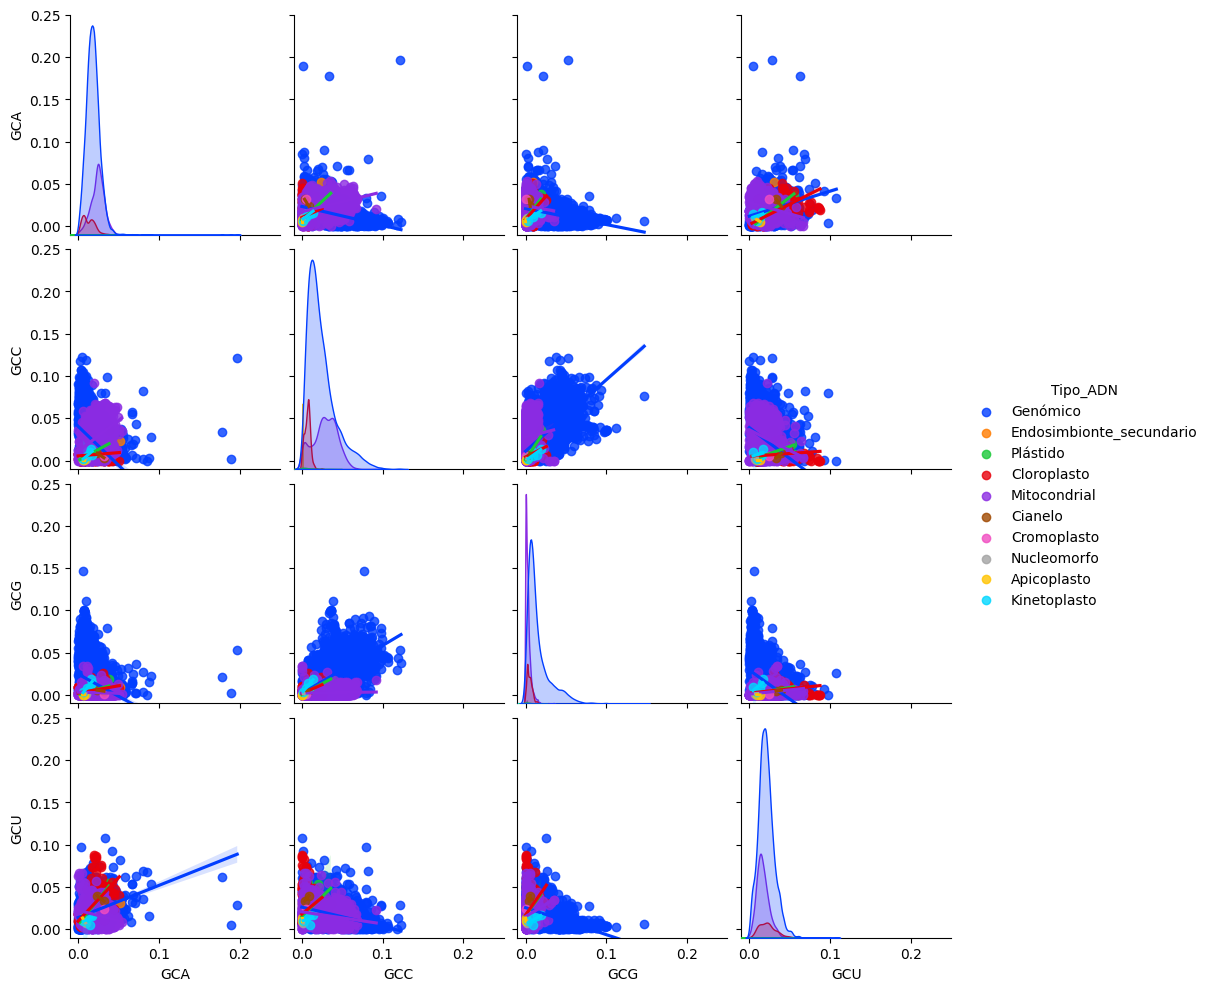

In [30]:
# Select the codons that encode the amino acid alanine
#alanina = codones.loc[:, ['GCA', 'GCC', 'GCG', 'GCU']]

# Concatenate the variables
df = pd.concat([data["Tipo_ADN"], alanina], axis=1)

# Set color palette
colors = sns.color_palette("bright", 10)

# Create scatter plots + trend lines for all combinations
plot = sns.pairplot(df, hue="Tipo_ADN", kind="reg", palette=colors)

# Use the same scale in the graphs

lim = (0, 1, 2, 3)

for i, j in zip(lim, lim):
    plot.axes[i,j].set_xlim((-0.01, 0.25))
    plot.axes[i,j].set_ylim((-0.01, 0.25))

plt.show()

Figure 8: Scatter plots between all codon pairs encoding the amino acid alanine. The color legend indicates the DNA source.

As in Figure 7, the groups were not clearly separated by DNA source when the frequencies of alanine codon usage were analyzed. Again, the positive relationship between GCC and GCG is observed. Also, it is observed that the vast majority of the data correspond to genomic codons.

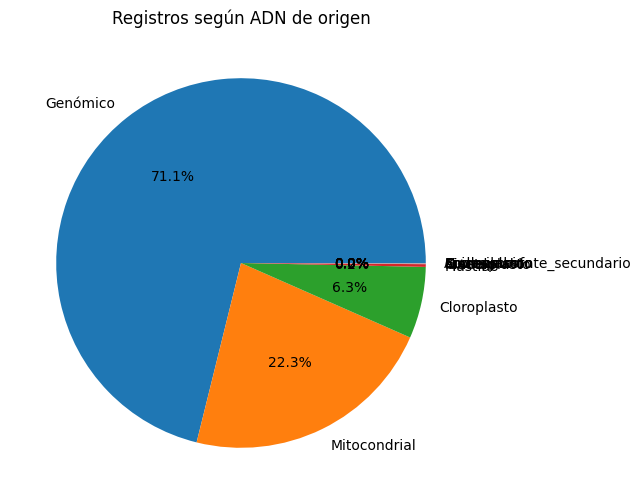

In [31]:
# Pie chart showing dataset records by DNA type

# Count records by DNA type
kingdom_counts = data['Tipo_ADN'].value_counts()

plt.figure(figsize=(6, 6))

# Plot using 'kingdom_counts' indices as labels, and add the numeric values to one decimal place
plt.pie(kingdom_counts, labels=kingdom_counts.index, autopct='%1.1f%%')

plt.title('Registros según ADN de origen')
plt.show()

Figure 9: Classification of dataset records according to DNA type (source DNA).

Figure 9 shows that more than 70% of the records correspond to genomic DNA, followed by mitochondrial DNA with 22.3%. For further analysis, it may be preferable to eliminate those records with very low N.

## 5. How does the frequency of usage of all codons vary within each taxonomic group?

Having observed that the correlations between frequencies seem to depend on each particular group, radar graphs were made for different taxonomic groups in order to visualize the frequency in the use of all codons together.

In [49]:
data2 = pd.read_csv('codon_usage_v2.csv', low_memory=False)
data3 = data2.iloc[:, [0] + list(range(6, 70))]
print(data3.shape)

(13024, 65)


In [34]:
data3.head()

Grupo_taxonomico      UUU      UUC      UUA      UUG      CUU      CUC  \
0            Virus  0.01654  0.01203  0.00050  0.00351  0.01203  0.03208   
1            Virus  0.02714  0.01357  0.00068  0.00678  0.00407  0.02849   
2            Virus  0.01974  0.02180  0.01357  0.01543  0.00782  0.01111   
3            Virus  0.01775  0.02245  0.01619  0.00992  0.01567  0.01358   
4            Virus  0.02816  0.01371  0.00767  0.03679  0.01380  0.00548   

       CUA      CUG      AUU  ...      CGG      AGA      AGG      GAU  \
0  0.00100  0.04010  0.00551  ...  0.00451  0.01303  0.03559  0.01003   
1  0.00204  0.04410  0.01153  ...  0.00136  0.01696  0.03596  0.01221   
2  0.01028  0.01193  0.02283  ...  0.00596  0.01974  0.02489  0.03126   
3  0.00940  0.01723  0.02402  ...  0.00366  0.01410  0.01671  0.03760   
4  0.00473  0.02076  0.02716  ...  0.00604  0.01494  0.01734  0.04148   

       GAC      GAA      GAG      UAA      UAG      UGA  
0  0.04612  0.01203  0.04361  0.00251  0.00050  0.00000  
1  0.04545  0.01560  0.04410  0.00271  0.00068  0.00000  
2  0.02036  0.02242  0.02468  0.00391  0.00000  0.00144  
3  0.01932  0.03029  0.03446  0.00261  0.00157  0.00000  
4  0.02483  0.03359  0.03679  0.00000  0.00044  0.00131  

[5 rows x 65 columns]

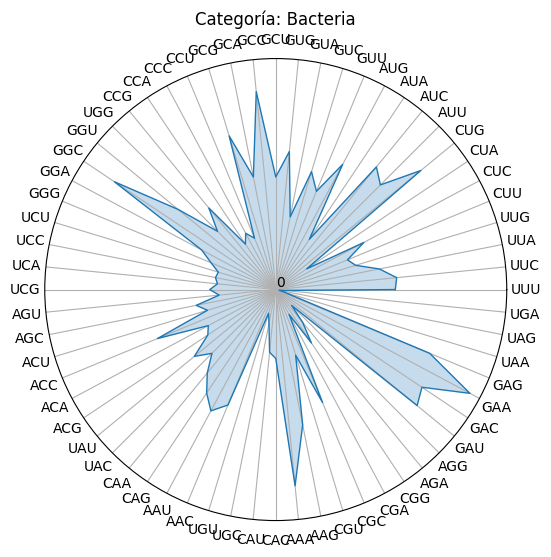

In [35]:
# Extract columns with codon frequencies
frecuencias = data3.iloc[:, 1:]

# Filter the dataset by the taxonomic category of interest
grupo_taxo = 'Bacteria'
subset = data3[data3['Grupo_taxonomico'] == grupo_taxo]
subset_numericas = subset.iloc[:, 1:]

# Calculate the average values for each codon
valores_promedio = subset_numericas.mean().values

# Calculate angles for radar chart
angulos = np.linspace(0, 2 * np.pi, len(valores_promedio), endpoint=False).tolist()
angulos += angulos[:1]
valores_promedio = np.concatenate((valores_promedio, [valores_promedio[0]]))

# Plot
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': 'polar'})

ax.set_xticks(angulos[:-1])
ax.set_xticklabels(frecuencias.columns.tolist())
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(['0', '0.5', '1'])

ax.plot(angulos, valores_promedio, linewidth=1, linestyle='solid')
ax.fill(angulos, valores_promedio, alpha=0.25)

ax.set_title(f'Categoría: {grupo_taxo}')

plt.show()

Figure 10: Radar chart of the Bacteria group showing the frequency of use of all codons in the dataset.

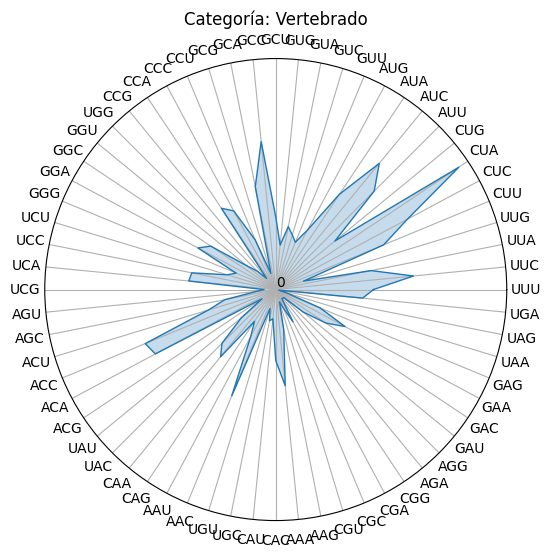

In [36]:
# Extract columns with codon frequencies
frecuencias = data3.iloc[:, 1:]

# Filter the dataset by the taxonomic category of interest
grupo_taxo = 'Vertebrado'
subset = data3[data3['Grupo_taxonomico'] == grupo_taxo]
subset_numericas = subset.iloc[:, 1:]

# Calculate the average values for each codon
valores_promedio = subset_numericas.mean().values

# Calculate angles for radar chart
angulos = np.linspace(0, 2 * np.pi, len(valores_promedio), endpoint=False).tolist()
angulos += angulos[:1]
valores_promedio = np.concatenate((valores_promedio, [valores_promedio[0]]))

# Plot
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': 'polar'})

ax.set_xticks(angulos[:-1])
ax.set_xticklabels(frecuencias.columns.tolist())
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(['0', '0.5', '1'])

ax.plot(angulos, valores_promedio, linewidth=1, linestyle='solid')
ax.fill(angulos, valores_promedio, alpha=0.25)

ax.set_title(f'Categoría: {grupo_taxo}')

plt.show()

Figure 11: Radar chart of the Vertebrate group showing the frequency of use of all codons in the dataset.

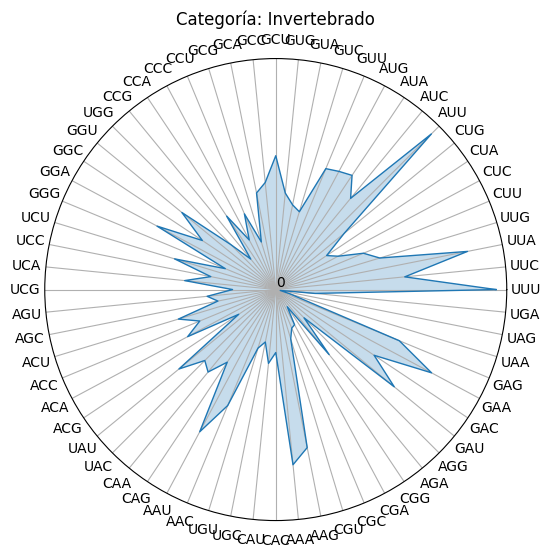

In [37]:
# Extract columns with codon frequencies
frecuencias = data3.iloc[:, 1:]

# Filter the dataset by the taxonomic category of interest
grupo_taxo = 'Invertebrado'
subset = data3[data3['Grupo_taxonomico'] == grupo_taxo]
subset_numericas = subset.iloc[:, 1:]

# Calculate the average values for each codon
valores_promedio = subset_numericas.mean().values

# Calculate angles for radar chart
angulos = np.linspace(0, 2 * np.pi, len(valores_promedio), endpoint=False).tolist()
angulos += angulos[:1]
valores_promedio = np.concatenate((valores_promedio, [valores_promedio[0]]))

# Plot
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': 'polar'})

ax.set_xticks(angulos[:-1])
ax.set_xticklabels(frecuencias.columns.tolist())
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(['0', '0.5', '1'])

ax.plot(angulos, valores_promedio, linewidth=1, linestyle='solid')
ax.fill(angulos, valores_promedio, alpha=0.25)

ax.set_title(f'Categoría: {grupo_taxo}')

plt.show()

Figure 12: Radar chart of the Invertebrate group showing the frequency of use of all codons in the dataset.

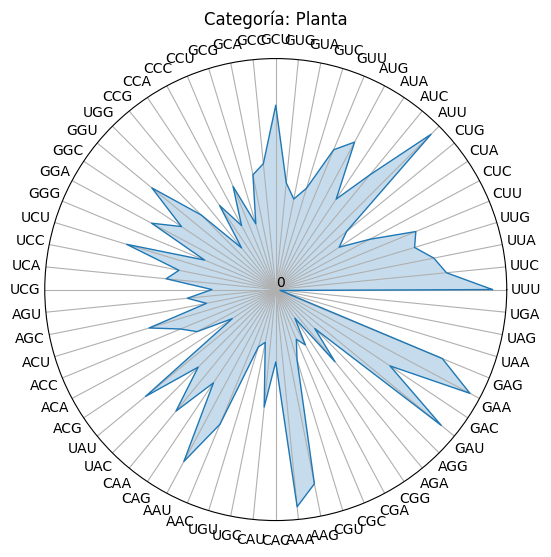

In [38]:
# Extract columns with codon frequencies
frecuencias = data3.iloc[:, 1:]

# Filter the dataset by the taxonomic category of interest
grupo_taxo = 'Planta'
subset = data3[data3['Grupo_taxonomico'] == grupo_taxo]
subset_numericas = subset.iloc[:, 1:]

# Calculate the average values for each codon
valores_promedio = subset_numericas.mean().values

# Calculate angles for radar chart
angulos = np.linspace(0, 2 * np.pi, len(valores_promedio), endpoint=False).tolist()
angulos += angulos[:1]
valores_promedio = np.concatenate((valores_promedio, [valores_promedio[0]]))

# Plot
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': 'polar'})

ax.set_xticks(angulos[:-1])
ax.set_xticklabels(frecuencias.columns.tolist())
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(['0', '0.5', '1'])

ax.plot(angulos, valores_promedio, linewidth=1, linestyle='solid')
ax.fill(angulos, valores_promedio, alpha=0.25)

ax.set_title(f'Categoría: {grupo_taxo}')

plt.show()

Figure 13: Radar chart of the Plant group showing the frequency of use of all codons in the dataset.

Figures 10-13 show that different taxonomic groups show different patterns in codon usage frequencies. For example, the Vertebrate group shows a preference for the codon CUA (Figure 11) that is not shown by the Bacteria, Invertebrates and Plant groups (Figures 10, 12 and 13). These results support the hypothesis that it is possible to classify sequences into taxonomic groups from the set of their frequency data.

## 6. Principal component analysis (PCA)

To assess whether the data set could be described using dimensionality reduction methods, a principal component analysis was performed with all frequencies, discriminating the categories of the explanatory variables in the graphs.

### 6.1. PCA by taxonomic group

In [3]:
valores_unicos = data3['Grupo_taxonomico'].unique()
print(valores_unicos) # 11 groups

['Virus' 'Archaea' 'Bacteria' 'Bacteriófago' 'Plásmido' 'Planta'
 'Invertebrado' 'Vertebrado' 'Mamífero' 'Roedor' 'Primate']


['Virus' 'Archaea' 'Bacteria' 'Bacteriófago' 'Plásmido' 'Planta'
 'Invertebrado' 'Vertebrado' 'Mamífero' 'Roedor' 'Primate']


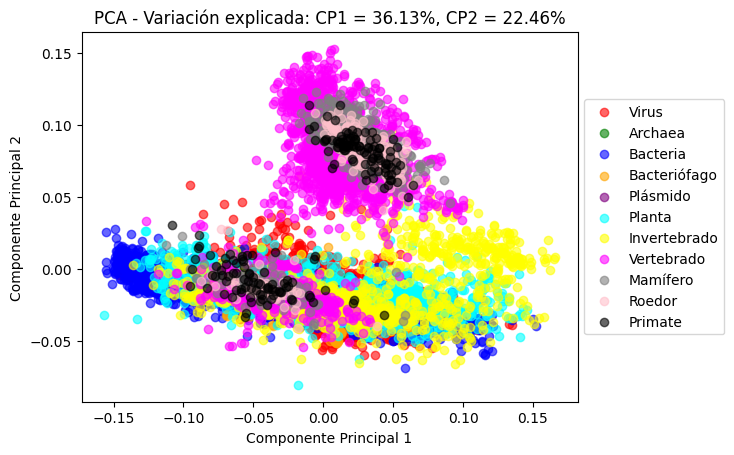

In [4]:
valores_unicos = data3['Grupo_taxonomico'].unique()
print(valores_unicos) # 11 groups

# PCA
pca = PCA(n_components=2)
components = pca.fit_transform(data3.iloc[:, 1:])

# Get unique categories from "Grupo_taxonomico" column
grupo_taxo = data3['Grupo_taxonomico'].unique()

# PCA with colors by category
colores = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'yellow', 'magenta', 'gray', 'pink', 'black']

fig, ax = plt.subplots()
for categoria, color in zip(grupo_taxo, colores):
    indices = data3['Grupo_taxonomico'] == categoria
    ax.scatter(components[indices, 0], components[indices, 1], c=color, label=categoria, alpha=0.6)

ax.legend()
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')

# Percentage of variation explained by each principal component
var_exp = pca.explained_variance_ratio_
ax.set_title(f'PCA - Variación explicada: CP1 = {var_exp[0]*100:.2f}%, CP2 = {var_exp[1]*100:.2f}%')

# Legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Figure 14: Principal component analysis (PC 1 and 2) with codon usage frequencies classified by taxonomic group.

Figure 14 shows that there is a considerable overlap between taxonomic groups. CP2 discriminates quite well the group formed by vertebrates (Vertebrado + Mamífero + Roedor + Primate), although it only explains 22.46% of the variation. In turn, CP1 and 2 separate the group formed by Mamífero + Roedor + Primate. However, vertebrate data are observed in other groups. The dispersion of the data does not allow us to distinguish the formation of another cluster.

In [41]:
# Print the charge components of codons
nombres_columnas = data3.columns[1:]

componentes_de_carga = pca.components_

print("Componentes de carga:")
for i, componente in enumerate(componentes_de_carga):
    print(f"Componente {i+1}:")
    for nombre_col, carga in zip(nombres_columnas, componente):
        print(f"Carga de la característica {nombre_col}: {carga:.4f}")
    print()

Componentes de carga:
Componente 1:
Carga de la característica UUU: 0.2405
Carga de la característica UUC: -0.0775
Carga de la característica UUA: 0.3034
Carga de la característica UUG: 0.0376
Carga de la característica CUU: 0.0768
Carga de la característica CUC: -0.1315
Carga de la característica CUA: 0.1028
Carga de la característica CUG: -0.2450
Carga de la característica AUU: 0.2572
Carga de la característica AUC: -0.1064
Carga de la característica AUA: 0.1917
Carga de la característica AUG: -0.0260
Carga de la característica GUU: 0.0917
Carga de la característica GUC: -0.1499
Carga de la característica GUA: 0.1023
Carga de la característica GUG: -0.1490
Carga de la característica GCU: 0.0566
Carga de la característica GCC: -0.2464
Carga de la característica GCA: 0.0514
Carga de la característica GCG: -0.1763
Carga de la característica CCU: 0.0463
Carga de la característica CCC: -0.0850
Carga de la característica CCA: 0.0609
Carga de la característica CCG: -0.1202
Carga de la carac

When the charge components of each codon are calculated, it can be observed that the contribution of each one is different when explaining the variability of the data.

['Virus' 'Archaea' 'Bacteria' 'Bacteriófago' 'Plásmido' 'Planta'
 'Invertebrado' 'Vertebrado' 'Mamífero' 'Roedor' 'Primate']


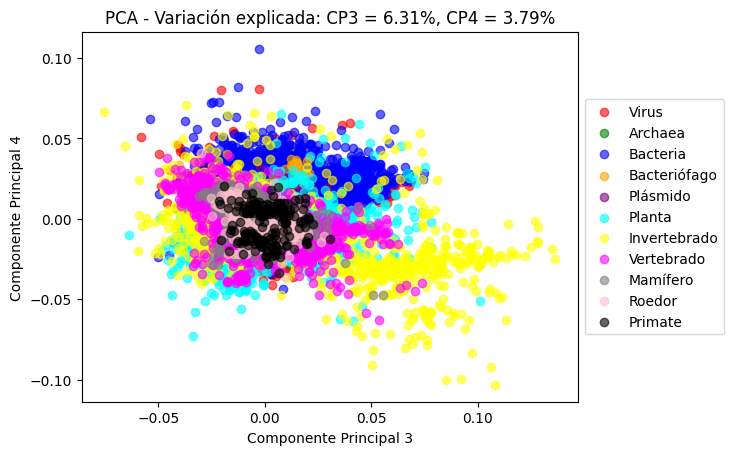

In [42]:
valores_unicos = data3['Grupo_taxonomico'].unique()
print(valores_unicos) # 11 groups

# PCA
pca = PCA(n_components=4)
components = pca.fit_transform(data3.iloc[:, 1:])

# Get unique categories from "Grupo_taxonomico" column
#grupo_taxo = data3['Grupo_taxonomico'].unique()

# PCA with colors by category
colores = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'yellow', 'magenta', 'gray', 'pink', 'black']

fig, ax = plt.subplots()
for categoria, color in zip(grupo_taxo, colores):
    indices = data3['Grupo_taxonomico'] == categoria
    ax.scatter(components[indices, 2], components[indices, 3], c=color, label=categoria, alpha=0.6)

ax.legend()
ax.set_xlabel('Componente Principal 3')
ax.set_ylabel('Componente Principal 4')

# Percentage of variation explained by each principal component
var_exp = pca.explained_variance_ratio_
ax.set_title(f'PCA - Variación explicada: CP3 = {var_exp[2]*100:.2f}%, CP4 = {var_exp[3]*100:.2f}%')

# Legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Figure 15: Principal component analysis (PC 3 and 4) with codon usage frequencies classified by taxonomic group.

CP3 and 4 explain a very low percentage of the observed variability (6.31 and 3.79%, respectively).

### 6.2. PCA by type of DNA source

In [43]:
data4 = data2.iloc[:, [1] + list(range(6, 70))]

In [44]:
data4.head()

Tipo_ADN      UUU      UUC      UUA      UUG      CUU      CUC      CUA  \
0  Genómico  0.01654  0.01203  0.00050  0.00351  0.01203  0.03208  0.00100   
1  Genómico  0.02714  0.01357  0.00068  0.00678  0.00407  0.02849  0.00204   
2  Genómico  0.01974  0.02180  0.01357  0.01543  0.00782  0.01111  0.01028   
3  Genómico  0.01775  0.02245  0.01619  0.00992  0.01567  0.01358  0.00940   
4  Genómico  0.02816  0.01371  0.00767  0.03679  0.01380  0.00548  0.00473   

       CUG      AUU  ...      CGG      AGA      AGG      GAU      GAC  \
0  0.04010  0.00551  ...  0.00451  0.01303  0.03559  0.01003  0.04612   
1  0.04410  0.01153  ...  0.00136  0.01696  0.03596  0.01221  0.04545   
2  0.01193  0.02283  ...  0.00596  0.01974  0.02489  0.03126  0.02036   
3  0.01723  0.02402  ...  0.00366  0.01410  0.01671  0.03760  0.01932   
4  0.02076  0.02716  ...  0.00604  0.01494  0.01734  0.04148  0.02483   

       GAA      GAG      UAA      UAG      UGA  
0  0.01203  0.04361  0.00251  0.00050  0.00000  
1  0.01560  0.04410  0.00271  0.00068  0.00000  
2  0.02242  0.02468  0.00391  0.00000  0.00144  
3  0.03029  0.03446  0.00261  0.00157  0.00000  
4  0.03359  0.03679  0.00000  0.00044  0.00131  

[5 rows x 65 columns]

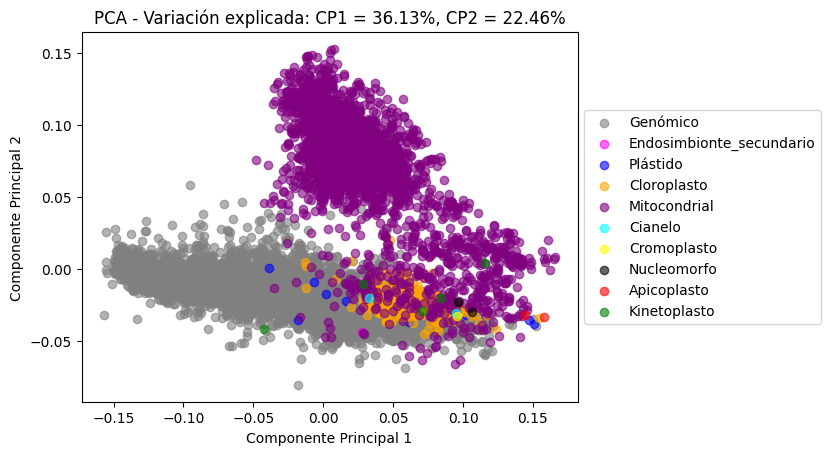

In [45]:
# PCA
pca = PCA(n_components=4)
components = pca.fit_transform(data4.iloc[:, 1:])

# Get unique categories from "Tipo_ADN" column
tipo_adn = data4['Tipo_ADN'].unique()

# PCA with colors by "Tipo_ADN" category
colores = ['gray', 'magenta', 'blue', 'orange', 'purple', 'cyan', 'yellow', 'black', 'red', 'green']

fig, ax = plt.subplots()
for categoria, color in zip(tipo_adn, colores):
    indices = data2['Tipo_ADN'] == categoria
    ax.scatter(components[indices, 0], components[indices, 1], c=color, label=categoria, alpha=0.6)

ax.legend()
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')

# Percentage of variation explained by each principal component
var_exp = pca.explained_variance_ratio_
ax.set_title(f'PCA - Variación explicada: CP1 = {var_exp[0]*100:.2f}%, CP2 = {var_exp[1]*100:.2f}%')

# Legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Figure 16: Principal component analysis (PC 1 and 2) with codon usage frequencies classified according to DNA source.

In this PCA it can be observed that the group separated by CP1 and 2 (identified in Figure 14 as vertebrates), seems to include entirely data corresponding to vertebrate mitochondrial DNA.

In [46]:
valores_unicos = data4['Tipo_ADN'].unique()
print(valores_unicos) # 10 groups

['Genómico' 'Endosimbionte_secundario' 'Plástido' 'Cloroplasto'
 'Mitocondrial' 'Cianelo' 'Cromoplasto' 'Nucleomorfo' 'Apicoplasto'
 'Kinetoplasto']


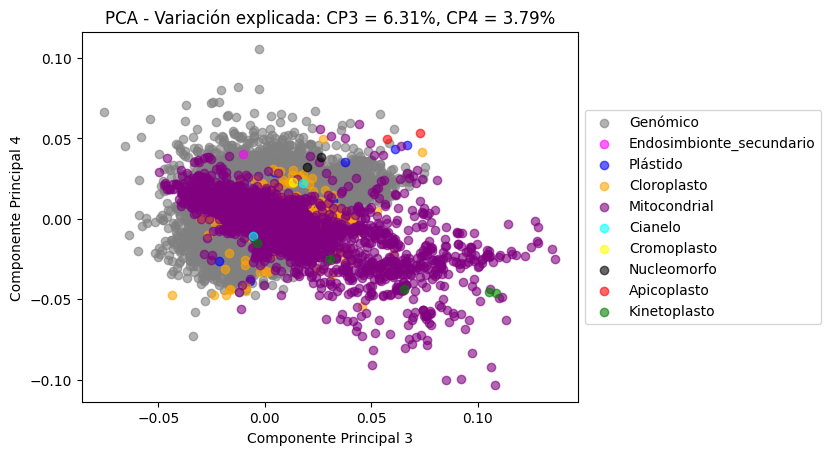

In [47]:
# PCA
pca = PCA(n_components=4)
components = pca.fit_transform(data4.iloc[:, 1:])

# Get unique categories from "Tipo_ADN" column
tipo_adn = data4['Tipo_ADN'].unique()

# PCA with colors by "Tipo_ADN" category
colores = ['gray', 'magenta', 'blue', 'orange', 'purple', 'cyan', 'yellow', 'black', 'red', 'green']

fig, ax = plt.subplots()
for categoria, color in zip(tipo_adn, colores):
    indices = data4['Tipo_ADN'] == categoria
    ax.scatter(components[indices, 2], components[indices, 3], c=color, label=categoria, alpha=0.6)

ax.legend()
ax.set_xlabel('Componente Principal 3')
ax.set_ylabel('Componente Principal 4')

# Percentage of variation explained by each principal component
var_exp = pca.explained_variance_ratio_
ax.set_title(f'PCA - Variación explicada: CP3 = {var_exp[2]*100:.2f}%, CP4 = {var_exp[3]*100:.2f}%')

# Legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Figure 17: Principal component analysis (PC 3 and 4) with codon usage frequencies classified according to DNA source.

Figures 16 and 17 show that when classifying the data according to the DNA source, the principal component analysis is not able to explain the variability observed in the sample based solely on these categories.

All these results show that this dataset may benefit from a joint categorization between grupo taxonómico + tipo de ADN.

Furthermore, it is important to note that in the vast majority of genomes, mitochondrial DNA and DNA from other sources are not separated from genomic DNA, but all sequences are together in a single file. For this reason, it would be most useful to be able to group DNA type data by taxonomic group.

## Conclusions

1. Different taxonomic groups show different patterns in codon usage frequencies.
2. Different codons provide different information for classifying sequences into their taxonomic group and DNA source.

# Machine Learning Model

As mentioned above, the goal of this project is to build a model that allows predicting the taxonomic group and DNA source of a sequence from its codon usage frequencies. Since the target variables are categorical and multiclass, the Random Forest and Support Vector Machine (SVM) methods were used to generate the Machine Learning (ML) models. In the case of Random Forest, for each target variable two models were built: one using all codons, and a second model based on a subset of codons selected by the cross-validation method. Finally, all models were compared using different metrics.

## Models with taxonomic group as target variable

## Balancing dataset

Oversampling balancing was performed to equalize the number of instances in the classes to be predicted.

In [3]:
# Load data
data = pd.read_csv('codon_usage_v2.csv')

# Separate the data into attributes (X) and target variable (Y)
X = data.iloc[:, 6:]
y = data['Grupo_taxonomico']

# Create the object
ros = RandomOverSampler(random_state=42)

# The data is balanced
X_ros_taxo, y_ros_taxo = ros.fit_resample(X, y)

# Balanced data is partitioned
X_train_taxo, X_test_taxo, y_train_taxo, y_test_taxo = train_test_split(X_ros_taxo, y_ros_taxo, test_size=0.30, random_state=42)

## Random Forest

### Model 1: Random forest using all codons.

In [4]:
# Create and train the Random Forest model
clf_grupo_taxonomico = RandomForestClassifier(n_estimators=100, random_state=42, 
                                              class_weight="balanced", max_features="log2")
clf_grupo_taxonomico.fit(X_train_taxo, y_train_taxo)

# Prediction in training set
y_test_pred_taxo = clf_grupo_taxonomico.predict(X_test_taxo)

### Confusion matrix

In [5]:
# Confusion matrix
cm_model_1_1 = confusion_matrix(y_test_taxo, y_test_pred_taxo)

# Create a dataframe with the categories of the matrix
categorias = data['Grupo_taxonomico'].unique().tolist()

df_cm_model_1_1 = pd.DataFrame(cm_model_1_1, index=categorias, columns=categorias)

print(df_cm_model_1_1)

              Virus  Archaea  Bacteria  Bacteriófago  Plásmido  Planta  \
Virus           911        0         0             0         0       0   
Archaea           4      838         6             4         0      13   
Bacteria          0        0       840             0         0       0   
Bacteriófago      0        5         0           852         1      21   
Plásmido          0        0         0             0       852       0   
Planta            0       16         0            16         0     836   
Invertebrado      0        0         0             0         0       0   
Vertebrado        0        0         0             0         0       0   
Mamífero          0        0         0             0         0       0   
Roedor            0        1         0             7         1       7   
Primate           1       16         0             6         0      26   

              Invertebrado  Vertebrado  Mamífero  Roedor  Primate  
Virus                    0           0     

In [6]:
# The global accuracy for multiclass classifier is calculated according to the formula:
# (Sum of values of the diagonal) / (Sum of all values in the matrix).
# https://codingvision.net/avoid-a-mistake-correctly-calculate-multiclass-accuracy

accuracy_score(y_test_taxo, y_test_pred_taxo)

#global_accuracy_model_1_1 = df_cm_model_1_1.diagonal().sum() / df_cm_model_1_1.sum()
#print(f"Exactitud: {global_accuracy_model_1_1}")

0.9761237413059275

The results show that the model correctly classified 98% of the samples.

In [7]:
# Calculate Precision by category
precision_model_1_1 = precision_score(y_test_taxo, y_test_pred_taxo, average=None)
print(precision_model_1_1)

[0.99454148 0.956621   0.9929078  0.96271186 0.99765808 0.92580288
 0.99883586 0.99886621 1.         0.99436302 0.91901012]


In [8]:
# Calculate Recall metric by category
recall_model_1_1 = recall_score(y_test_taxo, y_test_pred_taxo, average=None)
print(recall_model_1_1)

[1.         0.95335609 1.         0.94666667 1.         0.93407821
 1.         1.         1.         0.96498906 0.94232987]


In [9]:
# Calculate F1-score metric by category
f1_model_1_1 = f1_score(y_test_taxo, y_test_pred_taxo, average=None)
print(f1_model_1_1)

[0.99726327 0.95498575 0.99644128 0.95462185 0.99882767 0.92992214
 0.99941759 0.99943279 1.         0.97945586 0.93052392]


In [10]:
# Create dataframe with the results of the metrics
categorias = ['Virus',  'Archaea',  'Bacteria',  'Bacteriófago',  'Plásmido',  'Planta', 'Invertebrado',  
              'Vertebrado', 'Mamífero',  'Roedor',  'Primate']

metrics_model_1_1 = pd.DataFrame({
                    'Categoría': categorias,
                    'Precisión': precision_model_1_1,
                    'Recall': recall_model_1_1,
                    'F1-score': f1_model_1_1
                    })

print(metrics_model_1_1)

       Categoría  Precisión    Recall  F1-score
0          Virus   0.994541  1.000000  0.997263
1        Archaea   0.956621  0.953356  0.954986
2       Bacteria   0.992908  1.000000  0.996441
3   Bacteriófago   0.962712  0.946667  0.954622
4       Plásmido   0.997658  1.000000  0.998828
5         Planta   0.925803  0.934078  0.929922
6   Invertebrado   0.998836  1.000000  0.999418
7     Vertebrado   0.998866  1.000000  0.999433
8       Mamífero   1.000000  1.000000  1.000000
9         Roedor   0.994363  0.964989  0.979456
10       Primate   0.919010  0.942330  0.930524


The metrics calculated by category show that more than 90% of the positive predictions were correct in all categories. In general, the model identifies positive samples very well, although in some categories it presents a higher error rate (for example, to identify plant sequences).

## Feature selection

### Model 2: Random forest with attributes selected by cross-validation.

The RFECV method built into the sklearn.feature_selection class was used, which recursively eliminates attributes using cross-validation to choose the best attributes.

### Cross validation

In [11]:
# Create the attribute selector
selector = RFECV(clf_grupo_taxonomico, step=1, cv=5)

# Adjust the selector
selector = selector.fit(X_train_taxo, y_train_taxo)

# Extract selected attributes
selected_features_model_1_2 = X_train_taxo.columns[selector.support_]

# Print selected attributes
print("Atributos seleccionados:", selected_features_model_1_2)

Atributos seleccionados: Index(['UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC',
       'AUA', 'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG',
       'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC',
       'UCA', 'UCG', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC', 'CAA',
       'CAG', 'UGU', 'UGC', 'CAU', 'AAA', 'AAG', 'CGU', 'CGC', 'CGA', 'CGG',
       'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG', 'UAA', 'UGA'],
      dtype='object')


In [12]:
# Partitioning data into training and test sets
X_train_taxo_selected, X_test_taxo_selected, y_train_taxo_selected, y_test_taxo_selected = train_test_split(X_ros_taxo[selected_features_model_1_2], 
                                                                                        y_ros_taxo, test_size=0.30, 
                                                                                        random_state=42)

# Train the new Random Forest model with the selected attributes
selected_features_model_1_2 = RandomForestClassifier(n_estimators=100, random_state=42, 
                                              class_weight="balanced", max_features="log2")
selected_features_model_1_2.fit(X_train_taxo_selected, y_train_taxo_selected)

# Making predictions on the test set
y_test_pred_taxo_selected = selected_features_model_1_2.predict(X_test_taxo_selected)

# Confusion matrix
cm_selected_model_1_2 = confusion_matrix(y_test_taxo_selected, y_test_pred_taxo_selected)

# Create a dataframe with the confusion matrix and its categories
df_cm_selected_model_1_2 = pd.DataFrame(cm_selected_model_1_2, index=categorias, columns=categorias)

print(df_cm_selected_model_1_2)

              Virus  Archaea  Bacteria  Bacteriófago  Plásmido  Planta  \
Virus           911        0         0             0         0       0   
Archaea           4      840         5             8         0       8   
Bacteria          0        0       840             0         0       0   
Bacteriófago      0        6         0           860         1      11   
Plásmido          0        0         0             0       852       0   
Planta            0       19         0            23         0     822   
Invertebrado      0        0         0             0         0       0   
Vertebrado        0        0         0             0         0       0   
Mamífero          0        0         0             0         0       0   
Roedor            0        1         0             7         7       4   
Primate           1       16         0             7         0      27   

              Invertebrado  Vertebrado  Mamífero  Roedor  Primate  
Virus                    0           0     

In [13]:
# Calculate Accuracy
global_accuracy_model_1_2 = accuracy_score(y_test_taxo_selected, y_test_pred_taxo_selected)
print(global_accuracy_model_1_2)

0.9756046922038825


The results show that the model correctly classified 98% of the samples.

In [14]:
# Calculate Precision by category
precision_model_1_2 = precision_score(y_test_taxo_selected, y_test_pred_taxo_selected, average=None)

In [15]:
# Calculate Recall metric by category
recall_model_1_2 = recall_score(y_test_taxo_selected, y_test_pred_taxo_selected, average=None)

In [16]:
# Calculate F1-score metric by category
f1_model_1_2 = f1_score(y_test_taxo_selected, y_test_pred_taxo_selected, average=None)

In [17]:
# Create dataframe with the results of the metrics
categorias = ['Virus',  'Archaea',  'Bacteria',  'Bacteriófago',  'Plásmido',  'Planta', 'Invertebrado',  
              'Vertebrado', 'Mamífero',  'Roedor',  'Primate']

metrics_model_1_2 = pd.DataFrame({
                    'Categoría': categorias,
                    'Precisión': precision_model_1_2,
                    'Recall': recall_model_1_2,
                    'F1-score': f1_model_1_2
                    })

print(metrics_model_1_2)

       Categoría  Precisión    Recall  F1-score
0          Virus   0.994541  1.000000  0.997263
1        Archaea   0.952381  0.955631  0.954003
2       Bacteria   0.994083  1.000000  0.997033
3   Bacteriófago   0.950276  0.955556  0.952909
4       Plásmido   0.990698  1.000000  0.995327
5         Planta   0.942661  0.918436  0.930390
6   Invertebrado   0.998836  1.000000  0.999418
7     Vertebrado   1.000000  1.000000  1.000000
8       Mamífero   1.000000  1.000000  1.000000
9         Roedor   0.991021  0.966083  0.978393
10       Primate   0.919865  0.940023  0.929835


The evaluation shows that this model with 58 attributes has similar performance to the model built with all attributes.

## Support Vector Machine (SVM)

### Model 3: SVM.

In [18]:
# Create the SVM model
svm_taxo_model = SVC(C = 100, kernel = 'linear', random_state=42)
svm_taxo_model.fit(X_train_taxo, y_train_taxo)

# Predictions
y_test_pred_taxo = svm_taxo_model.predict(X_test_taxo)

In [19]:
#categorias = data['Grupo_taxonomico'].unique().tolist()

# Confusion matrix
cm_selected_model_1_3 = confusion_matrix(y_test_taxo, y_test_pred_taxo)

# Create a dataframe with the confusion matrix and its categories
df_cm_selected_model_1_3 = pd.DataFrame(cm_selected_model_1_3, index=categorias, columns=categorias)

print(df_cm_selected_model_1_3)

              Virus  Archaea  Bacteria  Bacteriófago  Plásmido  Planta  \
Virus           890       13         0             0         0       0   
Archaea          21      722        55            11         0      23   
Bacteria          7       63       764             4         0       0   
Bacteriófago      5       27        16           692         3      62   
Plásmido          0        0         0             2       664       0   
Planta            3       18        11            79         1     743   
Invertebrado      0        0         0             0         0       0   
Vertebrado        0        0         0             0        18       0   
Mamífero          0        3         0             7        80       0   
Roedor            0        1         0            26        38       3   
Primate           6        6         8            32         0      39   

              Invertebrado  Vertebrado  Mamífero  Roedor  Primate  
Virus                    0           0     

In [20]:
# Calculate Accuracy
accuracy_score(y_test_taxo, y_test_pred_taxo)

0.8615176995743797

The results show that the model correctly classified 86% of the samples.

In [21]:
# Calculate Precision by category
precision_model_1_3 = precision_score(y_test_taxo, y_test_pred_taxo, average=None)

In [22]:
# Calculate Recall metric by category
recall_model_1_3 = recall_score(y_test_taxo, y_test_pred_taxo, average=None)

In [23]:
# Calculate F1-score metric by category
f1_model_1_3 = f1_score(y_test_taxo, y_test_pred_taxo, average=None)

In [24]:
# Create dataframe with the results of the metrics

#categorias = ['Virus',  'Archaea',  'Bacteria',  'Bacteriófago',  'Plásmido',  'Planta', 'Invertebrado',  
#              'Vertebrado', 'Mamífero',  'Roedor',  'Primate']

metrics_model_1_3 = pd.DataFrame({
                    'Categoría': categorias,
                    'Precisión': precision_model_1_3,
                    'Recall': recall_model_1_3,
                    'F1-score': f1_model_1_3
                    })

print(metrics_model_1_3)

       Categoría  Precisión    Recall  F1-score
0          Virus   0.954936  0.976948  0.965817
1        Archaea   0.846424  0.821388  0.833718
2       Bacteria   0.894614  0.909524  0.902007
3   Bacteriófago   0.811254  0.768889  0.789504
4       Plásmido   0.825871  0.779343  0.801932
5         Planta   0.854023  0.830168  0.841926
6   Invertebrado   0.949115  1.000000  0.973893
7     Vertebrado   0.820106  0.879682  0.848850
8       Mamífero   0.739421  0.794258  0.765859
9         Roedor   0.920441  0.822757  0.868862
10       Primate   0.858250  0.893887  0.875706


The model obtained by the SVM method presents a considerably lower performance than the RF models (models 1 and 2). Both the global Accuracy and the Precision and Recall metrics are superior in all cases for the RF models. The SVM model performed particularly poorly in identifying correct positive predictions for the Mamífero category (74%).

## Models with DNA type as target variable

## Balancing dataset

Oversampling balancing was performed to equalize the number of instances in the classes to be predicted.

In [25]:
# Separate the data into attributes (X) and target variable (Y)
X = data.iloc[:, 6:]
y = data['Tipo_ADN']

# Create object
#ros = RandomOverSampler(random_state=42)

# The data is balanced
X_ros_adn, y_ros_adn = ros.fit_resample(X, y)

# Balanced data is partitioned
X_train_adn, X_test_adn, y_train_adn, y_test_adn = train_test_split(X_ros_adn, y_ros_adn, test_size=0.30, random_state=42)

## Random Forest

### Model 1: Random forest using all codons.

In [26]:
# Create and train the Random Forest model
clf_adn = RandomForestClassifier(n_estimators=100, random_state=42, 
                                 class_weight="balanced", max_features="log2")
clf_adn.fit(X_train_adn, y_train_adn)

# Prediction on training set
y_test_pred_adn = clf_adn.predict(X_test_adn)

In [27]:
# Confusion matrix
cm_model_2_1 = confusion_matrix(y_test_adn, y_test_pred_adn)

# Create a dataframe with the categories of the matrix
categorias = data['Tipo_ADN'].unique().tolist()

df_cm_model_2_1 = pd.DataFrame(cm_model_2_1, index=categorias, columns=categorias)

print(df_cm_model_2_1)

                          Genómico  Endosimbionte_secundario  Plástido  \
Genómico                      2750                         0         0   
Endosimbionte_secundario         0                      2713         0   
Plástido                         0                         0      2955   
Cloroplasto                      0                         0         0   
Mitocondrial                     0                         0         0   
Cianelo                          0                         0         0   
Cromoplasto                      0                         0         0   
Nucleomorfo                      0                         0         2   
Apicoplasto                      0                         0         0   
Kinetoplasto                     0                         0         0   

                          Cloroplasto  Mitocondrial  Cianelo  Cromoplasto  \
Genómico                            0             0        0            0   
Endosimbionte_secundario       

In [28]:
# Calculate Accuracy
global_accuracy_model_2_1 = accuracy_score(y_test_adn, y_test_pred_adn)
print(global_accuracy_model_2_1)

0.9996402230617017


Los resultados muestran que el modelo clasificó correctamente casi el 100% de las muestras.

In [29]:
# Calculate Precision by category
precision_model_2_1 = precision_score(y_test_adn, y_test_pred_adn, average=None)

In [30]:
# Calculate Recall Metric
recall_model_2_1 = recall_score(y_test_adn, y_test_pred_adn, average=None)

In [31]:
# Calculate F1-score metric
f1_model_2_1 = f1_score(y_test_adn, y_test_pred_adn, average=None)

In [32]:
# Create dataframe with the results of the metrics
categorias = ['Genómico',  'Endosimbionte_secundario',  'Plástido',  'Cloroplasto',  'Mitocondrial',  'Cianelo', 
              'Cromoplasto', 'Nucleomorfo', 'Apicoplasto',  'Kinetoplasto']

metrics_model_2_1 = pd.DataFrame({
                    'Categoría': categorias,
                    'Precisión': precision_model_2_1,
                    'Recall': recall_model_2_1,
                    'F1-score': f1_model_2_1
                    })

print(metrics_model_2_1)

                  Categoría  Precisión    Recall  F1-score
0                  Genómico   1.000000  1.000000  1.000000
1  Endosimbionte_secundario   1.000000  1.000000  1.000000
2                  Plástido   0.999324  1.000000  0.999662
3               Cloroplasto   1.000000  1.000000  1.000000
4              Mitocondrial   1.000000  1.000000  1.000000
5                   Cianelo   0.997476  0.999639  0.998556
6               Cromoplasto   1.000000  1.000000  1.000000
7               Nucleomorfo   0.999639  0.996758  0.998196
8               Apicoplasto   1.000000  1.000000  1.000000
9              Kinetoplasto   1.000000  1.000000  1.000000


The metrics calculated by category show that more than 99% of the positive predictions were correct. The model correctly identifies all positive samples in most categories.

### Model 2: Random forest with attributes selected by cross-validation.

The RFECV method built into the sklearn.feature_selection class was used, which recursively eliminates attributes using cross-validation to choose the best attributes.

### Cross validation

In [33]:
# Create the attribute selector
selector = RFECV(clf_adn, step=1, cv=5)

# Adjust the selector
selector = selector.fit(X_train_adn, y_train_adn)

# Extract selected attributes
selected_features_model_2_2 = X_train_adn.columns[selector.support_]

# Print selected attributes
print("Atributos seleccionados:", selected_features_model_2_2)

Atributos seleccionados: Index(['UUU', 'UUC', 'UUA', 'CUA', 'AUA', 'AUG', 'GUG', 'GCA', 'CCA', 'UGG',
       'GGU', 'CAA', 'AAU', 'AAC', 'CAU', 'CAC', 'AAA', 'CGU', 'CGA', 'AGA',
       'GAU', 'GAC', 'GAA', 'UGA'],
      dtype='object')


In [34]:
# Partitioning data into training and test sets
X_train_adn_selected, X_test_adn_selected, y_train_adn_selected, y_test_adn_selected = train_test_split(X_ros_adn[selected_features_model_2_2], 
                                                                                        y_ros_adn, test_size=0.30, 
                                                                                        random_state=42)

# Train the new Random Forest model with the selected attributes
clf_selected_features_model_2_2 = RandomForestClassifier(n_estimators=100, random_state=42, 
                                              class_weight="balanced", max_features="log2")
clf_selected_features_model_2_2.fit(X_train_adn_selected, y_train_adn_selected)

# Make predictions on the test set
y_test_pred_adn_selected = clf_selected_features_model_2_2.predict(X_test_adn_selected)

# Confusion matrix
cm_selected_model_2_2 = confusion_matrix(y_test_adn_selected, y_test_pred_adn_selected)

# Create a dataframe with the confusion matrix
df_cm_selected_model_2_2 = pd.DataFrame(cm_selected_model_2_2, index=categorias, columns=categorias)

print(df_cm_selected_model_2_2)

                          Genómico  Endosimbionte_secundario  Plástido  \
Genómico                      2750                         0         0   
Endosimbionte_secundario         0                      2713         0   
Plástido                         0                         0      2955   
Cloroplasto                      0                         0         0   
Mitocondrial                     0                         0         0   
Cianelo                          0                         0         0   
Cromoplasto                      0                         0         0   
Nucleomorfo                      0                         0         2   
Apicoplasto                      0                         0         0   
Kinetoplasto                     0                         0         0   

                          Cloroplasto  Mitocondrial  Cianelo  Cromoplasto  \
Genómico                            0             0        0            0   
Endosimbionte_secundario       

In [35]:
# Calculate Accuracy
global_accuracy_model_2_2 = accuracy_score(y_test_adn_selected, y_test_pred_adn_selected)
print(global_accuracy_model_2_2)

0.999604245367872


The results show that the model correctly classified almost 100% of the samples.

In [36]:
# Calculate Precision by category
precision_model_2_2 = precision_score(y_test_adn_selected, y_test_pred_adn_selected, average=None)

In [37]:
# Calculate Recall metric by category
recall_model_2_2 = recall_score(y_test_adn_selected, y_test_pred_adn_selected, average=None)

In [38]:
# Calculate F1-score metric by category
f1_model_2_2 = f1_score(y_test_adn_selected, y_test_pred_adn_selected, average=None)

In [39]:
# Create dataframe with the results of the metrics
categorias = ['Genómico',  'Endosimbionte_secundario',  'Plástido',  'Cloroplasto',  'Mitocondrial',  'Cianelo', 
              'Cromoplasto', 'Nucleomorfo', 'Apicoplasto',  'Kinetoplasto']

metrics_model_2_2 = pd.DataFrame({
                    'Categoría': categorias,
                    'Precisión': precision_model_2_2,
                    'Recall': recall_model_2_2,
                    'F1-score': f1_model_2_2
                    })

print(metrics_model_2_2)

                  Categoría  Precisión    Recall  F1-score
0                  Genómico   1.000000  1.000000  1.000000
1  Endosimbionte_secundario   1.000000  1.000000  1.000000
2                  Plástido   0.999324  1.000000  0.999662
3               Cloroplasto   1.000000  1.000000  1.000000
4              Mitocondrial   1.000000  1.000000  1.000000
5                   Cianelo   0.997475  0.999277  0.998375
6               Cromoplasto   1.000000  1.000000  1.000000
7               Nucleomorfo   0.999278  0.996758  0.998016
8               Apicoplasto   1.000000  1.000000  1.000000
9              Kinetoplasto   1.000000  1.000000  1.000000


This model built from 24 attributes has similar performance to the model built with all attributes.

## Support Vector Machine (SVM)

### Model 3: SVM.

In [40]:
# Create the SVM model
svm_adn_model = SVC(C = 100, kernel = 'linear', random_state=42)
svm_adn_model.fit(X_train_adn, y_train_adn)

# Predictions
y_test_adn_pred = svm_adn_model.predict(X_test_adn)

In [41]:
#categorias = data['Tipo_ADN'].unique().tolist()

# Confusion matrix
cm_selected_model_2_3 = confusion_matrix(y_test_adn, y_test_adn_pred)

# Create a dataframe with the confusion matrix and its categories
df_cm_selected_model_2_3 = pd.DataFrame(cm_selected_model_2_3, index=categorias, columns=categorias)

print(df_cm_selected_model_2_3)

                          Genómico  Endosimbionte_secundario  Plástido  \
Genómico                      2750                         0         0   
Endosimbionte_secundario         0                      2713         0   
Plástido                         0                         2      2815   
Cloroplasto                      0                         0         0   
Mitocondrial                     0                         0         0   
Cianelo                          0                         1        25   
Cromoplasto                      0                         0         0   
Nucleomorfo                      0                         0        18   
Apicoplasto                      0                         0         0   
Kinetoplasto                     0                         0        76   

                          Cloroplasto  Mitocondrial  Cianelo  Cromoplasto  \
Genómico                            0             0        0            0   
Endosimbionte_secundario       

In [42]:
# Calculate Accuracy
accuracy_score(y_test_adn, y_test_adn_pred)

0.9895664687893506

Los resultados muestran que el modelo clasificó correctamente el 99% de las muestras.

In [43]:
# Calculate Precision by category
precision_model_2_3 = precision_score(y_test_adn, y_test_adn_pred, average=None)

In [44]:
# Calculate Recall metric by category
recall_model_2_3 = recall_score(y_test_adn, y_test_adn_pred, average=None)

In [45]:
# Calculate F1-score metric by category
f1_model_2_3 = f1_score(y_test_adn, y_test_adn_pred, average=None)

In [46]:
# Create dataframe with the results of the metrics

metrics_model_2_3 = pd.DataFrame({
                    'Categoría': categorias,
                    'Precisión': precision_model_2_3,
                    'Recall': recall_model_2_3,
                    'F1-score': f1_model_2_3
                    })

print(metrics_model_2_3)

                  Categoría  Precisión    Recall  F1-score
0                  Genómico   1.000000  1.000000  1.000000
1  Endosimbionte_secundario   0.998895  1.000000  0.999447
2                  Plástido   0.959441  0.952623  0.956020
3               Cloroplasto   1.000000  1.000000  1.000000
4              Mitocondrial   1.000000  1.000000  1.000000
5                   Cianelo   0.995984  0.985905  0.990919
6               Cromoplasto   0.999648  1.000000  0.999824
7               Nucleomorfo   0.999635  0.987392  0.993476
8               Apicoplasto   0.997815  1.000000  0.998906
9              Kinetoplasto   0.946248  0.971841  0.958874


The model obtained by the SVM method presents a lower performance than the RF models (models 1 and 2). Although the results of the metrics of the three models can be considered equivalent in most cases, in the SVM model less than 97% of the positive predictions were correct for the Plástido (96%) and Kinetoplasto (95%) categories; this percentage rises to more than 99% using RF.

## Models based on linear combinations of the original variables

### Models with taxonomic group as target variable

In order to improve the performance of the ML models described above, a principal component analysis was performed without limiting the number of components. The goal was to identify the number of components that capture at least 90% of the variability of the data and then use these components to train a new ML model.

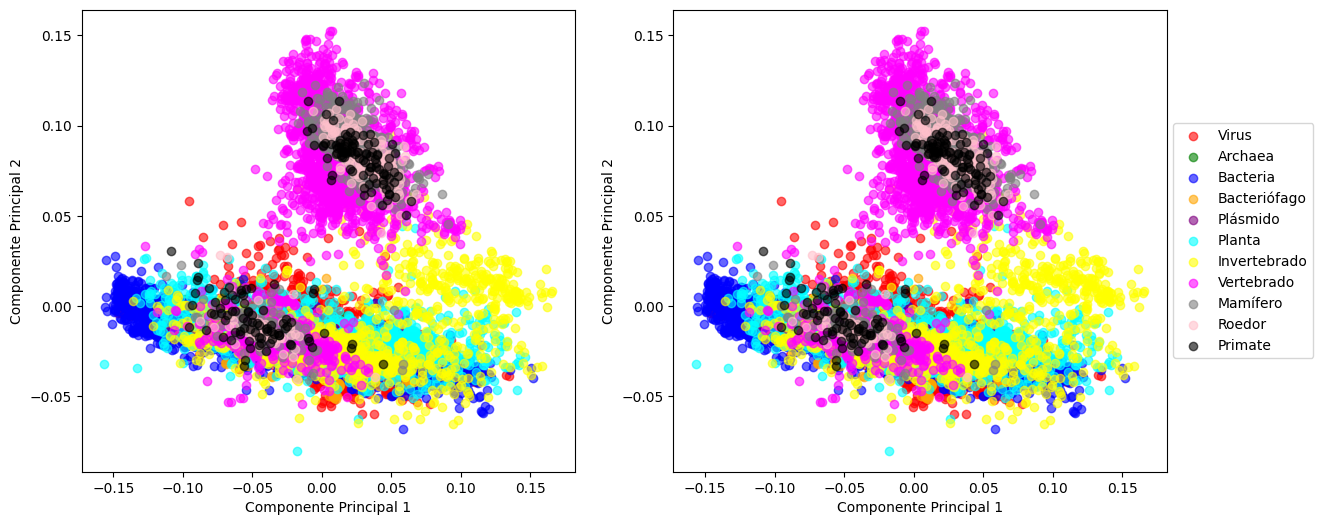

In [50]:
#data3 = data2.iloc[:, [0] + list(range(6, 70))]

# PCA with n_components=2
pca_2 = PCA(n_components=2)
components_2 = pca_2.fit_transform(data3.iloc[:, 1:])

# PCA without specifying n_components
pca_full = PCA()
components_full = pca_full.fit_transform(data3.iloc[:, 1:])

# Get unique categories from "Grupo_taxonomico" column
grupo_taxo = data3['Grupo_taxonomico'].unique()

# Colors by category
colores = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'yellow', 'magenta', 'gray', 'pink', 'black']

# Subplot 1 - PCA with n_components=2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

for categoria, color in zip(grupo_taxo, colores):
    indices = data3['Grupo_taxonomico'] == categoria
    ax1.scatter(components_2[indices, 0], components_2[indices, 1], c=color, label=categoria, alpha=0.6)

#ax1.legend()
ax1.set_xlabel('Componente Principal 1')
ax1.set_ylabel('Componente Principal 2')

# Percentage of variation explained by each principal component
var_exp_2 = pca_2.explained_variance_ratio_

# Subplot 2 - PCA without specifying n_components
for categoria, color in zip(grupo_taxo, colores):
    indices = data3['Grupo_taxonomico'] == categoria
    ax2.scatter(components_full[indices, 0], components_full[indices, 1], c=color, label=categoria, alpha=0.6)

ax2.legend()
ax2.set_xlabel('Componente Principal 1')
ax2.set_ylabel('Componente Principal 2')

# Percentage of variation explained by each principal component
var_exp_full = pca_full.explained_variance_ratio_

# Legend
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Although at first glance both PCAs seem identical, when checking the eigenvalues ​​for each PCA, the principal components (and the variance explained by each one) are observed to be indeed different.
Considering that the sklearn package calculates the n_components as

n_components == min(n_samples, n_features)

the result is verified by creating a PCA manually specifying n_components = 64.
The verifications mentioned are presented below:

In [51]:
pca_n2 = PCA(n_components=2)
pca_n64 = PCA(n_components=64)

components_n2 = pca_n2.fit_transform(data3.iloc[:, 1:])
components_n64 = pca_n64.fit_transform(data3.iloc[:, 1:])

print("Valores propios para n_components=2:", pca_n2.explained_variance_)
print("Valores propios para n_components=64:", pca_n64.explained_variance_)

Valores propios para n_components=2: [0.00302042 0.00187803]
Valores propios para n_components=64: [3.02041888e-03 1.87802807e-03 5.27458582e-04 3.16658252e-04
 2.41127580e-04 1.86456875e-04 1.77459535e-04 1.50566788e-04
 1.25298748e-04 1.12274133e-04 9.86277615e-05 9.40599814e-05
 8.34381681e-05 8.12420660e-05 6.48514313e-05 5.98561076e-05
 5.95403198e-05 5.57126532e-05 5.24791693e-05 5.00563919e-05
 4.75823897e-05 4.64661476e-05 4.27748041e-05 3.82391583e-05
 3.78718283e-05 3.59254929e-05 3.32686949e-05 3.20416816e-05
 3.18162440e-05 3.05492019e-05 2.94388981e-05 2.90582282e-05
 2.73115466e-05 2.62182103e-05 2.56922754e-05 2.49436123e-05
 2.34933995e-05 2.29661835e-05 2.21190256e-05 2.14219468e-05
 2.03490706e-05 1.96810958e-05 1.93482432e-05 1.82362420e-05
 1.82128145e-05 1.73344380e-05 1.69348591e-05 1.64987273e-05
 1.59452157e-05 1.45272926e-05 1.37500497e-05 1.27016064e-05
 1.24000834e-05 1.14298630e-05 1.12135258e-05 1.08079042e-05
 9.58922560e-06 9.51054776e-06 8.95374503e-06 8

In [52]:
print("Componentes principales para n_components=2:")
print(pca_n2.components_)

print("\nComponentes principales para n_components=64:")
print(pca_n64.components_)

Componentes principales para n_components=2:
[[ 2.40462537e-01 -7.74646247e-02  3.03399591e-01  3.75802280e-02
   7.68132207e-02 -1.31461321e-01  1.02789736e-01 -2.45027251e-01
   2.57158541e-01 -1.06433417e-01  1.91711922e-01 -2.59577942e-02
   9.16504323e-02 -1.49918517e-01  1.02287470e-01 -1.49043403e-01
   5.66115070e-02 -2.46367445e-01  5.14409932e-02 -1.76310565e-01
   4.63418446e-02 -8.50271636e-02  6.09187110e-02 -1.20190237e-01
  -3.36576627e-02  3.99996045e-02 -2.25299153e-01  6.75559572e-02
  -3.90166481e-02  1.03171523e-01 -5.52632119e-02  1.06954336e-01
  -6.55494389e-02  5.86915183e-02 -7.06355918e-02  9.08121903e-02
  -1.29574324e-01  1.06332164e-01 -7.40505198e-02  1.58777444e-01
  -6.64848301e-02  1.06367137e-01 -1.37693158e-01  2.01672792e-01
  -6.94939887e-02  3.43464681e-02 -4.62013689e-02  5.72221918e-02
  -6.46698813e-02  2.23842822e-01 -1.07710394e-01 -2.78328187e-04
  -1.52616849e-01  2.16843581e-02 -7.82290116e-02  7.04029773e-02
  -1.35852339e-02  8.95440772e-

In [53]:
print("Varianza explicada por cada componente para n_components=2:", pca_n2.explained_variance_ratio_)
print("Varianza explicada por cada componente para n_components=64:", pca_n64.explained_variance_ratio_)

Varianza explicada por cada componente para n_components=2: [0.36125975 0.22462313]
Varianza explicada por cada componente para n_components=64: [3.61259745e-01 2.24623129e-01 6.30871281e-02 3.78741770e-02
 2.88402674e-02 2.23013316e-02 2.12251972e-02 1.80086675e-02
 1.49864623e-02 1.34286423e-02 1.17964565e-02 1.12501233e-02
 9.97969239e-03 9.71702574e-03 7.75661008e-03 7.15914018e-03
 7.12137011e-03 6.66355882e-03 6.27681525e-03 5.98703692e-03
 5.69113180e-03 5.55762273e-03 5.11611648e-03 4.57362674e-03
 4.52969192e-03 4.29689885e-03 3.97913029e-03 3.83237232e-03
 3.80540866e-03 3.65386303e-03 3.52106421e-03 3.47553387e-03
 3.26662054e-03 3.13585113e-03 3.07294624e-03 2.98340176e-03
 2.80994783e-03 2.74688972e-03 2.64556469e-03 2.56218999e-03
 2.43386774e-03 2.35397405e-03 2.31416293e-03 2.18116109e-03
 2.17835902e-03 2.07330006e-03 2.02550809e-03 1.97334418e-03
 1.90714095e-03 1.73754906e-03 1.64458628e-03 1.51918633e-03
 1.48312242e-03 1.36707839e-03 1.34120320e-03 1.29268848e-03
 

### Model 4: Random forest based on principal components.

Principal components that explained 90% of the variance in the data were then identified and used to train a new RF model.

In [54]:
#pca_full = PCA()
#components = pca_full.fit_transform(data3.iloc[:, 1:])

# Obtain the cumulative explained variance
var_exp_cumulative = np.cumsum(pca_n64.explained_variance_ratio_)

# Find the number of principal components that explain at least 90% of the variance.
# Add '+1' since Python indices start at zero.
n_components_90_var = np.argmax(var_exp_cumulative >= 0.9) + 1

print(f"Número de componentes principales que explican al menos el 90% de la varianza: {n_components_90_var}")

Número de componentes principales que explican al menos el 90% de la varianza: 22


In [55]:
#print(n_components_90_var)
categorias = data['Grupo_taxonomico'].unique().tolist()

# Now, use this number of components in PCA
pca_90_var = PCA(n_components=n_components_90_var)

# Fit PCA to the training data
pca_90_var.fit(X_train_taxo)

# Use the same PCA on the test data
X_test_pca = pca_90_var.transform(X_test_taxo)

# Transforming the training data
X_train_pca = pca_90_var.transform(X_train_taxo)

# Create the Random Forest model
clf_grupo_taxonomico = RandomForestClassifier(n_estimators=100, random_state=42, 
                                              class_weight="balanced", max_features="log2")

# Train the model
clf_grupo_taxonomico.fit(X_train_pca, y_train_taxo)

# Make predictions on the PCA transformed test set
y_test_pred_pca = clf_grupo_taxonomico.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test_taxo, y_test_pred_pca)
    
# Calculate and save metrics by category
precision = precision_score(y_test_taxo, y_test_pred_pca, average=None)
recall = recall_score(y_test_taxo, y_test_pred_pca, average=None)
f1 = f1_score(y_test_taxo, y_test_pred_pca, average=None)

# Print accuracy.
print('Exactitud promedio:', accuracy)

Exactitud promedio: 0.9719713484895671


In [56]:
# Confusion matrix

#categorias = ['Virus',  'Archaea',  'Bacteria',  'Bacteriófago',  'Plásmido',  'Planta', 'Invertebrado',  
#              'Vertebrado', 'Mamífero',  'Roedor',  'Primate']

cm_selected_model_1_4 = confusion_matrix(y_test_taxo, y_test_pred_pca)

# Create a dataframe with the confusion matrix
df_cm_selected_model_1_4 = pd.DataFrame(cm_selected_model_1_4, index=categorias, columns=categorias)

print(df_cm_selected_model_1_4)

              Virus  Archaea  Bacteria  Bacteriófago  Plásmido  Planta  \
Virus           911        0         0             0         0       0   
Archaea           3      826         9            12         0      19   
Bacteria          0        0       840             0         0       0   
Bacteriófago      1       10         0           851         5      13   
Plásmido          0        0         0             0       852       0   
Planta            0       16         0            19         0     817   
Invertebrado      0        0         0             0         0       0   
Vertebrado        0        0         0             0         0       0   
Mamífero          0        0         0             0         0       0   
Roedor            0        1         0             6         9       2   
Primate           0       22         0            10         0      20   

              Invertebrado  Vertebrado  Mamífero  Roedor  Primate  
Virus                    0           0     

In [57]:
# Calculate accuracy.
accuracy_score(y_test_taxo, y_test_pred_pca)

0.9719713484895671

In [58]:
# Calculate Precision by category
precision_model_1_4 = precision_score(y_test_taxo, y_test_pred_pca, average=None)

# Calculate Recall metric
recall_model_1_4 = recall_score(y_test_taxo, y_test_pred_pca, average=None)

# Calculate F1-score metric
f1_model_1_4 = f1_score(y_test_taxo, y_test_pred_pca, average=None)

# Create dataframe with the results of the metrics
#categorias = ['Virus',  'Archaea',  'Bacteria',  'Bacteriófago',  'Plásmido',  'Planta', 'Invertebrado',  
#              'Vertebrado', 'Mamífero',  'Roedor',  'Primate']

metrics_model_1_4 = pd.DataFrame({
                    'Categoría': categorias,
                    'Precisión': precision_model_1_4,
                    'Recall': recall_model_1_4,
                    'F1-score': f1_model_1_4
                    })

print(metrics_model_1_4)

       Categoría  Precisión    Recall  F1-score
0          Virus   0.995628  1.000000  0.997809
1        Archaea   0.944000  0.939704  0.941847
2       Bacteria   0.989399  1.000000  0.994671
3   Bacteriófago   0.947661  0.945556  0.946607
4       Plásmido   0.983834  1.000000  0.991851
5         Planta   0.938002  0.912849  0.925255
6   Invertebrado   1.000000  1.000000  1.000000
7     Vertebrado   0.997735  1.000000  0.998866
8       Mamífero   1.000000  1.000000  1.000000
9         Roedor   0.985426  0.961707  0.973422
10       Primate   0.912360  0.936563  0.924303


### Model 5: Principal component based SVM

Furthermore, the principal components that explained 90% of the variance were used to train a new SVM-based model.

In [59]:
# Create the SVM model
svm_taxo_90_model = SVC(C=100, kernel='linear', random_state=42)
svm_taxo_90_model.fit(X_train_pca, y_train_taxo)

# Predictions
y_test_taxo_90_pred = svm_taxo_90_model.predict(X_test_pca)

In [60]:
#categorias = ['Virus',  'Archaea',  'Bacteria',  'Bacteriófago',  'Plásmido',  'Planta', 'Invertebrado',  
#              'Vertebrado', 'Mamífero',  'Roedor',  'Primate']

# Confusion matrix
cm_selected_model_1_5 = confusion_matrix(y_test_taxo, y_test_taxo_90_pred)

# Create a dataframe with the confusion matrix and its categories
df_cm_selected_model_1_5 = pd.DataFrame(cm_selected_model_1_5, index=categorias, columns=categorias)

print(df_cm_selected_model_1_5)

              Virus  Archaea  Bacteria  Bacteriófago  Plásmido  Planta  \
Virus           862       20         0             6         0      10   
Archaea          34      593        82            19         0      26   
Bacteria          7       72       702            10         0       8   
Bacteriófago     24       54        30           565         6      81   
Plásmido          0        0         0            16       527       0   
Planta            2       42         5            96         0     666   
Invertebrado      0      110         0             0         0       0   
Vertebrado        0        0         0             4        20       0   
Mamífero          0        3         0             9       108       0   
Roedor            0        1         0            40        65       2   
Primate          18       16         7            55         2      68   

              Invertebrado  Vertebrado  Mamífero  Roedor  Primate  
Virus                    0           0     

In [61]:
# Calculate Accuracy
accuracy_score(y_test_taxo, y_test_taxo_90_pred)

0.7537631059898267

In [62]:
# Calculate Precision by category
precision_model_1_5 = precision_score(y_test_taxo, y_test_taxo_90_pred, average=None)

# Calculate Recall metric
recall_model_1_5 = recall_score(y_test_taxo, y_test_taxo_90_pred, average=None)

# Calculate F1-score metric
f1_model_1_5 = f1_score(y_test_taxo, y_test_taxo_90_pred, average=None)

metrics_model_1_5 = pd.DataFrame({
                    'Categoría': categorias,
                    'Precisión': precision_model_1_5,
                    'Recall': recall_model_1_5,
                    'F1-score': f1_model_1_5
                    })

print(metrics_model_1_5)

       Categoría  Precisión    Recall  F1-score
0          Virus   0.910243  0.946213  0.927879
1        Archaea   0.650933  0.674630  0.662570
2       Bacteria   0.849879  0.835714  0.842737
3   Bacteriófago   0.689024  0.627778  0.656977
4       Plásmido   0.723901  0.618545  0.667089
5         Planta   0.773519  0.744134  0.758542
6   Invertebrado   0.839506  0.871795  0.855346
7     Vertebrado   0.683673  0.836549  0.752425
8       Mamífero   0.647273  0.638756  0.642986
9         Roedor   0.827497  0.698031  0.757270
10       Primate   0.706667  0.794694  0.748100


## Models with DNA type as target variable

### Model 4: Random forest based on principal components.

In [63]:
#print(n_components_90_var)

categorias = data['Tipo_ADN'].unique().tolist()

# Fit PCA to the training data
pca_90_var.fit(X_train_adn)

# Use the same PCA on the test data
X_test_pca = pca_90_var.transform(X_test_adn)

# Transform the training data
X_train_pca = pca_90_var.transform(X_train_adn)

# Create the Random Forest model
clf_adn = RandomForestClassifier(n_estimators=100, random_state=42, 
                                 class_weight="balanced", max_features="log2")

# Train the model
clf_adn.fit(X_train_pca, y_train_adn)

# Make predictions on the PCA transformed test set
y_test_pred_pca = clf_adn.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test_adn, y_test_pred_pca)
    
# Calculate and save metrics by category
precision = precision_score(y_test_adn, y_test_pred_pca, average=None)
recall = recall_score(y_test_adn, y_test_pred_pca, average=None)
f1 = f1_score(y_test_adn, y_test_pred_pca, average=None)

# Print accuracy
print('Exactitud promedio:', accuracy)

Exactitud promedio: 0.9996402230617017


In [64]:
# Confusion matrix

cm_selected_model_2_4 = confusion_matrix(y_test_adn, y_test_pred_pca)

# Create a dataframe with the confusion matrix
df_cm_selected_model_2_4 = pd.DataFrame(cm_selected_model_2_4, index=categorias, columns=categorias)

print(df_cm_selected_model_2_4)

                          Genómico  Endosimbionte_secundario  Plástido  \
Genómico                      2750                         0         0   
Endosimbionte_secundario         0                      2713         0   
Plástido                         0                         0      2955   
Cloroplasto                      0                         0         0   
Mitocondrial                     0                         0         0   
Cianelo                          0                         0         1   
Cromoplasto                      0                         0         0   
Nucleomorfo                      0                         0         0   
Apicoplasto                      0                         0         0   
Kinetoplasto                     0                         0         0   

                          Cloroplasto  Mitocondrial  Cianelo  Cromoplasto  \
Genómico                            0             0        0            0   
Endosimbionte_secundario       

In [65]:
# Calculate Precision by category
precision_model_2_4 = precision_score(y_test_adn, y_test_pred_pca, average=None)

# Calculate Recall metric
recall_model_2_4 = recall_score(y_test_adn, y_test_pred_pca, average=None)

# Calculate F1-score metric
f1_model_2_4 = f1_score(y_test_adn, y_test_pred_pca, average=None)

metrics_model_2_4 = pd.DataFrame({
                    'Categoría': categorias,
                    'Precisión': precision_model_2_4,
                    'Recall': recall_model_2_4,
                    'F1-score': f1_model_2_4
                    })

print(metrics_model_2_4)

                  Categoría  Precisión    Recall  F1-score
0                  Genómico   1.000000  1.000000  1.000000
1  Endosimbionte_secundario   1.000000  1.000000  1.000000
2                  Plástido   0.999662  1.000000  0.999831
3               Cloroplasto   1.000000  1.000000  1.000000
4              Mitocondrial   1.000000  1.000000  1.000000
5                   Cianelo   0.997115  0.999277  0.998195
6               Cromoplasto   1.000000  1.000000  1.000000
7               Nucleomorfo   0.999639  0.997118  0.998377
8               Apicoplasto   1.000000  1.000000  1.000000
9              Kinetoplasto   1.000000  1.000000  1.000000


### Model 4: Principal component based SVM

In [66]:
# Create the SVM model
svm_adn_90_model = SVC(C=100, kernel='linear', random_state=42)
svm_adn_90_model.fit(X_train_pca, y_train_adn)

# Predictions
y_test_adn_90_pred = svm_adn_90_model.predict(X_test_pca)

In [67]:
# Confusion matrix
cm_selected_model_2_5 = confusion_matrix(y_test_adn, y_test_adn_90_pred)

# Create a dataframe with the confusion matrix and its categories
df_cm_selected_model_2_5 = pd.DataFrame(cm_selected_model_2_5, index=categorias, columns=categorias)

print(df_cm_selected_model_2_5)

                          Genómico  Endosimbionte_secundario  Plástido  \
Genómico                      2750                         0         0   
Endosimbionte_secundario         0                      2713         0   
Plástido                         0                         6      2772   
Cloroplasto                      0                         0         0   
Mitocondrial                     0                         0         0   
Cianelo                          1                         8        49   
Cromoplasto                      0                         0         0   
Nucleomorfo                      0                         1        51   
Apicoplasto                      0                         0         0   
Kinetoplasto                     0                         0       234   

                          Cloroplasto  Mitocondrial  Cianelo  Cromoplasto  \
Genómico                            0             0        0            0   
Endosimbionte_secundario       

In [68]:
# Calculate Accuracy
accuracy_score(y_test_adn, y_test_adn_90_pred)

0.9741680158301853

In [69]:
# Calculate Precision by category
precision_model_2_5 = precision_score(y_test_adn, y_test_adn_90_pred, average=None)

# Calculate Recall metric
recall_model_2_5 = recall_score(y_test_adn, y_test_adn_90_pred, average=None)

# Calculate F1-score metric
f1_model_2_5 = f1_score(y_test_adn, y_test_adn_90_pred, average=None)

metrics_model_2_5 = pd.DataFrame({
                    'Categoría': categorias,
                    'Precisión': precision_model_2_5,
                    'Recall': recall_model_2_5,
                    'F1-score': f1_model_2_5
                    })

print(metrics_model_2_5)

                  Categoría  Precisión    Recall  F1-score
0                  Genómico   0.999636  1.000000  0.999818
1  Endosimbionte_secundario   0.994501  1.000000  0.997243
2                  Plástido   0.892466  0.938071  0.914701
3               Cloroplasto   0.999643  1.000000  0.999821
4              Mitocondrial   0.999638  1.000000  0.999819
5                   Cianelo   0.960262  0.951934  0.956080
6               Cromoplasto   0.999648  1.000000  0.999824
7               Nucleomorfo   0.999261  0.974063  0.986501
8               Apicoplasto   0.998542  1.000000  0.999271
9              Kinetoplasto   0.904544  0.877732  0.890936


## Model comparison by category metrics

Heatmaps were used to visualize the differences between the metrics per category calculated for the 5 models of each problem.

### Taxonomic group prediction

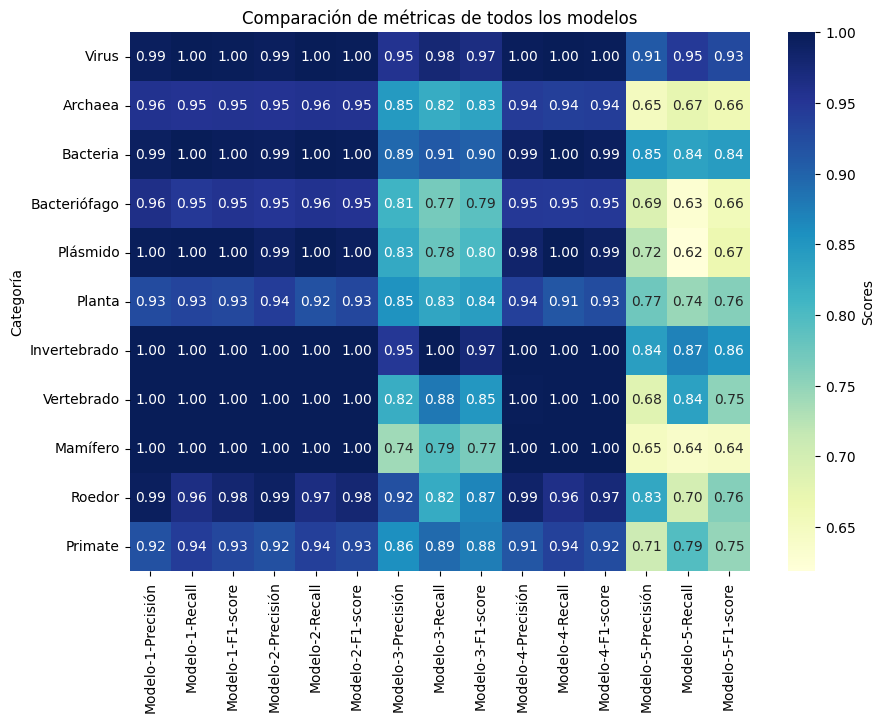

In [70]:
# Combine dataframes
combined_df = pd.concat([metrics_model_1_1.set_index('Categoría'), metrics_model_1_2.set_index('Categoría'), 
                         metrics_model_1_3.set_index('Categoría'), metrics_model_1_4.set_index('Categoría'), 
                         metrics_model_1_5.set_index('Categoría')], axis=1, 
                         keys=['Modelo-1', 'Modelo-2', 'Modelo-3', 'Modelo-4', 'Modelo-5'])

# Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(combined_df, annot=True, fmt='.2f', cmap="YlGnBu", cbar_kws={'label': 'Scores'})
plt.title('Comparación de métricas de todos los modelos')
plt.xlabel('')
plt.show()

It is clearly observed that the Random Forest approaches (models 1, 2 and 4) perform better than the SVM-based ones (models 3 and 5). Furthermore, the Random Forest models perform similarly regardless of the number of variables used and their selection methods. In contrast, the SVM model built with the 22 components that explained 90% of the variance was the worst performing overall (model 5), and inferior to its SVM counterpart built with all variables (model 3).

It is worth mentioning that there seem to be taxonomic categories that are easier to predict than others.

### DNA Source Prediction

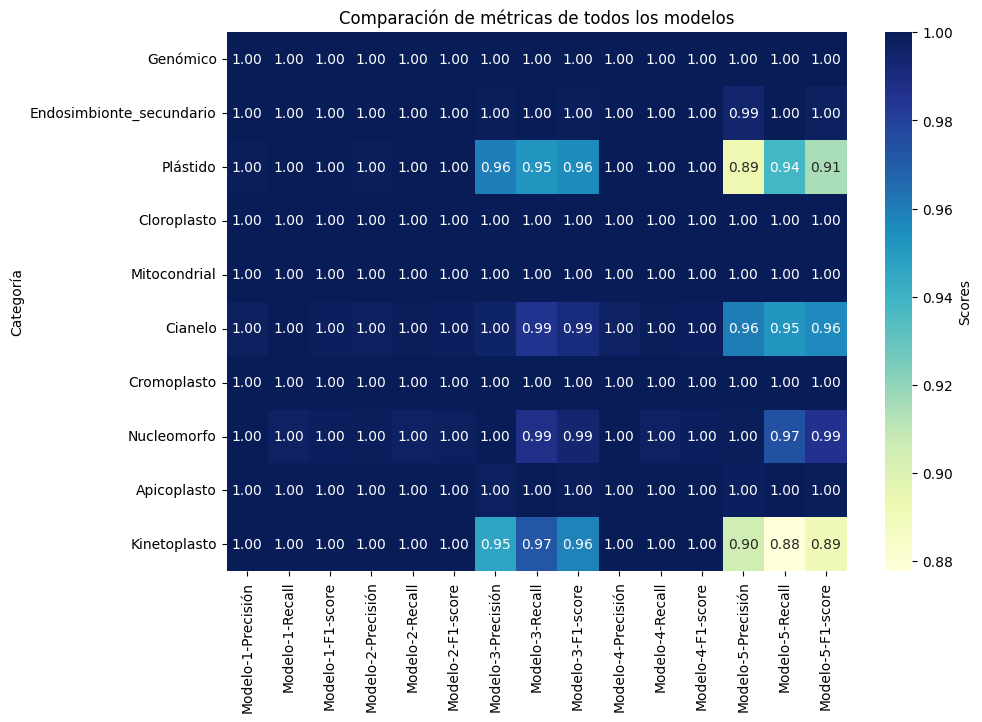

In [71]:
# Combine dataframes
combined_df = pd.concat([metrics_model_2_1.set_index('Categoría'), metrics_model_2_2.set_index('Categoría'), 
                         metrics_model_2_3.set_index('Categoría'), metrics_model_2_4.set_index('Categoría'), 
                         metrics_model_2_5.set_index('Categoría')], axis=1, 
                        keys=['Modelo-1', 'Modelo-2', 'Modelo-3', 'Modelo-4', 'Modelo-5'])

# Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(combined_df, annot=True, fmt='.2f', cmap="YlGnBu", cbar_kws={'label': 'Scores'})
plt.title('Comparación de métricas de todos los modelos')
plt.xlabel('')
plt.show()

In the case of the DNA source prediction problem, although the performance of the models built by SVM was lower than their counterparts based on Random Forest, it is observed that model 3 (SVM + all variables) has a very good accuracy (99%) and a lower number of unitary values in its metrics. It could be a good option to choose a model with less overfitting.

Unlike taxonomic group prediction, the performance in source DNA prediction is much more uniform between categories.

## Conclusions

1. The models generated by Random Forest (RF) showed a better performance than the SVM models, in particular in the taxonomic group classification problem, where the accuracy of the RF models exceeded that of SVM by 12% (98% vs 86%).
2. Although the overall accuracies of the models of both classification methods were equivalent in the case of the DNA source classification problem, the Random Forest models showed a better performance to classify certain categories (plastid and kinetoplast).
3. In the RF models it was observed that fewer codons are required to predict the DNA type (24) than to predict the taxonomic group (58) with a performance equivalent to the model built with all the attributes. In other words, a good model of lower complexity was obtained to predict the DNA type. The taxonomic classification problem seems to be more complex.
4. Components explaining 90% of the variance generated models with similar accuracy to models based on all variables or on variables selected by cross-validation using RF, while this approach generated less accurate models for SVM (86% vs 75% for taxonomic group prediction, and 99% vs 94% for source DNA).
5. The comparison of all tested models confirms that the RF approach performs better than SVM for these problems.
6. There seem to be taxonomic categories that are easier to predict than others, in line with what was mentioned in conclusion 3. In contrast, performance in source DNA prediction is much more uniform across categories.
7. For the taxonomic group problem, it is suggested to use RF-based models with fewer attributes (models 2 or 4) to decrease the complexity and computational cost. On the other hand, for the source DNA prediction problem, model 3 based on SVM using all variables seems a good option with less overfitting.

## Model improvement by cross-validation

The selected models were then retrained using the stratified K-fold cross-validation method. The purpose was to evaluate whether this approach improved the final performance compared to models trained using the traditional separation of the dataset into training and test sets.

### Models with taxonomic group as target variable

### Model 6: Stratified K-fold + Random Forest trained with principal components

This model consists of a modification of model 4 to predict taxonomic group, using the Stratified K-fold method to divide the dataset into k subsets.

In [72]:
# Initialize the StratifiedKFold object
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create the Random Forest model
clf_grupo_taxonomico = RandomForestClassifier(n_estimators=100, random_state=42, 
                                              class_weight="balanced", max_features="log2")

# Empty list to save metrics
list_accuracy = []
list_precision = []
list_recall = []
list_f1 = []

# Iterate over the training and test sets generated by StratifiedKFold
for train_index, test_index in skf.split(X_ros_taxo, y_ros_taxo):
    X_train, X_test = X_ros_taxo.iloc[train_index], X_ros_taxo.iloc[test_index]
    y_train, y_test = y_ros_taxo.iloc[train_index], y_ros_taxo.iloc[test_index]

    # Apply PCA
    pca = PCA(n_components=n_components_90_var)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train the model
    clf_grupo_taxonomico.fit(X_train_pca, y_train)

    # Make predictions
    y_test_pred_pca = clf_grupo_taxonomico.predict(X_test_pca)

    # Calculate accuracies and save them in a list
    accuracy = accuracy_score(y_test, y_test_pred_pca)
    list_accuracy.append(accuracy)
    
    # Calculate and save metrics by category
    precision = precision_score(y_test, y_test_pred_pca, average=None)
    recall = recall_score(y_test, y_test_pred_pca, average=None)
    f1 = f1_score(y_test, y_test_pred_pca, average=None)

    list_precision.append(precision)
    list_recall.append(recall)
    list_f1.append(f1)

# Calculate average metrics by category
average_precision = np.mean(list_precision, axis=0)
average_recall = np.mean(list_recall, axis=0)
average_f1 = np.mean(list_f1, axis=0)

# Create a dataframe with the metrics by category
metrics_model_1_6 = pd.DataFrame({
    'Categoría': np.unique(y_ros_taxo),
    'Precisión': average_precision,
    'Recall': average_recall,
    'F1-score': average_f1
})

# Calculate the average accuracy
average_accuracy = np.mean(list_accuracy)
print('Exactitud promedio:', average_accuracy)
print('Métricas por categoría:\n', metrics_model_1_6)

Exactitud promedio: 0.975489734955095
Métricas por categoría:
        Categoría  Precisión    Recall  F1-score
0        Archaea   0.994558  1.000000  0.997270
1       Bacteria   0.933520  0.950324  0.941501
2   Bacteriófago   0.995242  1.000000  0.997611
3   Invertebrado   0.953072  0.958545  0.955703
4       Mamífero   0.993890  0.999315  0.996589
5         Planta   0.940876  0.918809  0.929532
6       Plásmido   1.000000  0.978767  0.988950
7        Primate   0.999317  1.000000  0.999658
8         Roedor   0.998978  1.000000  0.999488
9     Vertebrado   0.992022  0.977731  0.984782
10         Virus   0.932094  0.946906  0.939355


The results show a slight increase in accuracy for Model 5 compared to Model 4 (98% vs. 97%, respectively). Although some metrics decreased for certain categories, such as Virus and Bacteria, they all remain above 95%. There is also a decrease in the number of unit values for all metrics.

### Comparison of taxonomic group models

Below is a heatmap including the 6 models evaluated in the project so far.

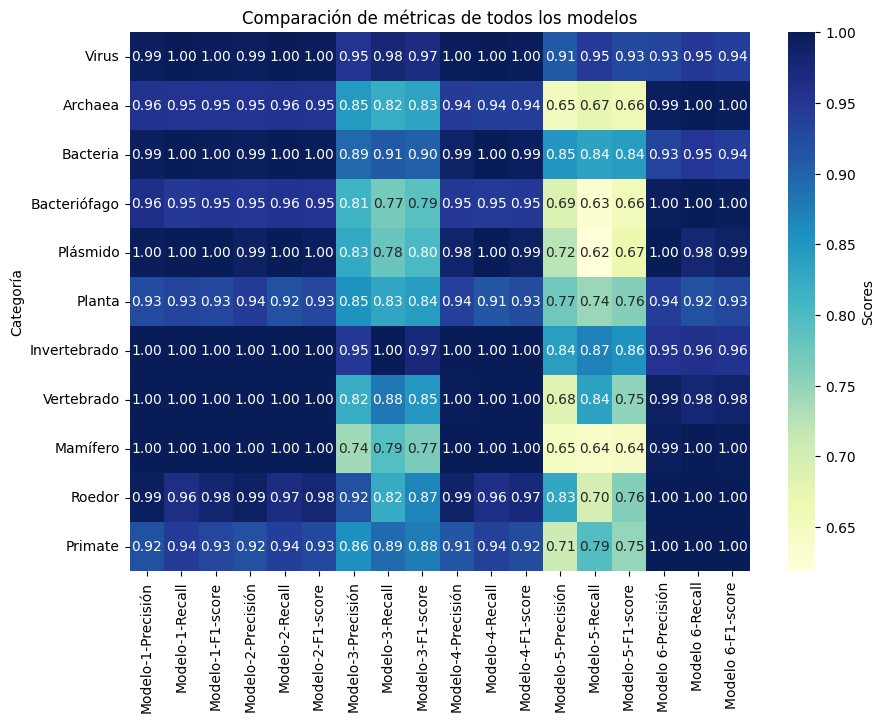

In [73]:
# Combine dataframes
combined_df = pd.concat([metrics_model_1_1.set_index('Categoría'), metrics_model_1_2.set_index('Categoría'), 
                         metrics_model_1_3.set_index('Categoría'), metrics_model_1_4.set_index('Categoría'), 
                         metrics_model_1_5.set_index('Categoría'), metrics_model_1_6.set_index('Categoría')], 
                         axis=1, keys=['Modelo-1', 'Modelo-2', 'Modelo-3', 'Modelo-4', 'Modelo-5', 'Modelo-6'])

# Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(combined_df, annot=True, fmt='.2f', cmap="YlGnBu", cbar_kws={'label': 'Scores'})
plt.title('Comparación de métricas de todos los modelos')
plt.xlabel('')
plt.show()

### Models with DNA source as a target variable

### Model 6: Stratified K-fold + SVM trained with all variables

This model consists of a modification of model 3 to predict the DNA source, using the Stratified-K fold method to divide the dataset into k subsets.

In [74]:
# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# SVM model
svm_model = SVC(C=100, kernel='linear', random_state=42)

# List to save accuracy
list_accuracy = []

# Lists for metrics by category
list_precision = []
list_recall = []
list_f1 = []

# Iterate over the training and test sets generated by StratifiedKFold
for train_index, test_index in skf.split(X_ros_adn, y_ros_adn):
    X_train, X_test = X_ros_adn.iloc[train_index], X_ros_adn.iloc[test_index]
    y_train, y_test = y_ros_adn.iloc[train_index], y_ros_adn.iloc[test_index]

    # Fit the SVM model
    svm_model.fit(X_train, y_train)

    # Predictions
    y_test_pred = svm_model.predict(X_test)

    # Calculate accuracies and save them in a list
    accuracy = accuracy_score(y_test, y_test_pred)
    list_accuracy.append(accuracy)

    # Calculate and save metrics by category
    precision = precision_score(y_test, y_test_pred, average=None)
    recall = recall_score(y_test, y_test_pred, average=None)
    f1 = f1_score(y_test, y_test_pred, average=None)

    list_precision.append(precision)
    list_recall.append(recall)
    list_f1.append(f1)

# Average accuracy
average_accuracy = np.mean(list_accuracy)
print('Exactitud promedio:', average_accuracy)

# Calculate average metrics by category
average_precision = np.mean(list_precision, axis=0)
average_recall = np.mean(list_recall, axis=0)
average_f1 = np.mean(list_f1, axis=0)

# Create a dataframe with the metrics by category
metrics_model_2_6 = pd.DataFrame({
    'Categoría': data['Tipo_ADN'].unique(),
    'Precisión': average_precision,
    'Recall': average_recall,
    'F1-score': average_f1
})

print('Métricas por categoría:\n', metrics_model_2_6)

Exactitud promedio: 0.9893577981651376
Métricas por categoría:
                   Categoría  Precisión    Recall  F1-score
0                  Genómico   0.999892  1.000000  0.999946
1  Endosimbionte_secundario   0.997847  1.000000  0.998922
2                  Plástido   0.957716  0.949270  0.953442
3               Cloroplasto   0.999892  1.000000  0.999946
4              Mitocondrial   0.999892  1.000000  0.999946
5                   Cianelo   0.994033  0.986940  0.990466
6               Cromoplasto   0.999246  1.000000  0.999623
7               Nucleomorfo   0.998473  0.987588  0.992996
8               Apicoplasto   0.998386  1.000000  0.999192
9              Kinetoplasto   0.949044  0.969779  0.959273


Similar to model 5 for taxonomic group prediction, some metrics decreased slightly for some categories, but all values were equal to or greater than 95%. The average accuracy did not vary at the second decimal level, being 99% in both models (3 and 5).

### Comparison of DNA source prediction models

Below is a heatmap including the 6 models evaluated in the project so far.

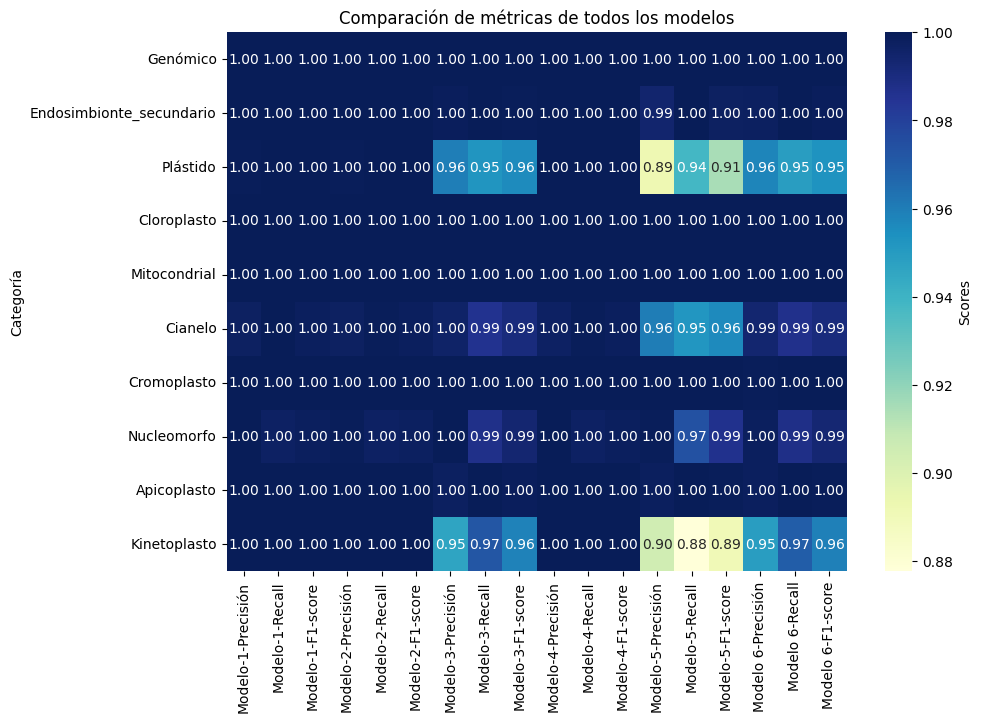

In [75]:
# Combine dataframes
combined_df = pd.concat([metrics_model_2_1.set_index('Categoría'), metrics_model_2_2.set_index('Categoría'), 
                         metrics_model_2_3.set_index('Categoría'), metrics_model_2_4.set_index('Categoría'), 
                         metrics_model_2_5.set_index('Categoría'), metrics_model_2_6.set_index('Categoría')], 
                         axis=1, keys=['Modelo-1', 'Modelo-2', 'Modelo-3', 'Modelo-4', 'Modelo-5', 'Modelo-6'])

# Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(combined_df, annot=True, fmt='.2f', cmap="YlGnBu", cbar_kws={'label': 'Scores'})
plt.title('Comparación de métricas de todos los modelos')
plt.xlabel('')
plt.show()

Since the dataset is large and had already been pre-balanced (implying that the amount of data and class imbalance were not an issue), it is plausible that applying Stratified-K fold contributed to improving the models by increasing the amount of data at the training step. By training with a larger amount of data at each iteration, it could have allowed the models to capture novel patterns more effectively.

## Conclusions

Models with datasets split by the Stratified-K fold method showed excellent performance and less overfitting compared to the original models. Therefore, they will be the models chosen to continue with the following steps.

## Hyperparameter optimization

A hyperparameter optimization was performed in order to improve the performance of the selected models for both problems.

### Models with taxonomic group as target variable

### Model 7: Stratified K-fold + Random Forest trained with principal components + optimized hyperparameters

In [76]:
# Define the hyperparameters to be tested
param_grid = {
    'n_estimators': [50, 100, 200],      # Values to test
    'max_depth': [10, 20, 30]            # Values to test
}

# Initialize the StratifiedKFold object
#skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create the RandomForestClassifier model
#clf_grupo_taxonomico = RandomForestClassifier(
#    random_state=42,
#    class_weight="balanced",
#    max_features="log2"
#)

# Empty list to save metrics
list_accuracy = []
list_precision = []
list_recall = []
list_f1 = []

# Iterate over the training and test sets generated by StratifiedKFold
for train_index, test_index in skf.split(X_ros_taxo, y_ros_taxo):
    X_train, X_test = X_ros_taxo.iloc[train_index], X_ros_taxo.iloc[test_index]
    y_train, y_test = y_ros_taxo.iloc[train_index], y_ros_taxo.iloc[test_index]

    # Apply PCA
    pca = PCA(n_components=n_components_90_var)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(clf_grupo_taxonomico, param_grid, cv=skf, scoring='accuracy')

    # Perform hyperparameter search
    grid_search.fit(X_train_pca, y_train)

    # Obtain the best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Use the best model to make predictions on the PCA transformed test set
    y_test_pred_pca = best_model.predict(X_test_pca)

    # Calculate accuracies and save them in a list
    accuracy = accuracy_score(y_test, y_test_pred_pca)
    list_accuracy.append(accuracy)

    # Calculate and save metrics by category
    precision = precision_score(y_test, y_test_pred_pca, average=None)
    recall = recall_score(y_test, y_test_pred_pca, average=None)
    f1 = f1_score(y_test, y_test_pred_pca, average=None)

    list_precision.append(precision)
    list_recall.append(recall)
    list_f1.append(f1)

# Calculate average metrics by category
average_precision = np.mean(list_precision, axis=0)
average_recall = np.mean(list_recall, axis=0)
average_f1 = np.mean(list_f1, axis=0)

# Create a dataframe with the metrics by category
metrics_model_1_7 = pd.DataFrame({
    'Categoría': np.unique(y_ros_taxo),
    'Precisión': average_precision,
    'Recall': average_recall,
    'F1-score': average_f1
})

# Calculate the average accuracy
average_accuracy = np.mean(list_accuracy)
print('Exactitud promedio:', average_accuracy)
print('Métricas por categoría:\n', metrics_model_1_7)

Exactitud promedio: 0.9772650963248413
Métricas por categoría:
        Categoría  Precisión    Recall  F1-score
0        Archaea   0.994557  1.000000  0.997269
1       Bacteria   0.944652  0.948953  0.946620
2   Bacteriófago   0.994231  1.000000  0.997102
3   Invertebrado   0.952553  0.961286  0.956814
4       Mamífero   0.996251  0.999315  0.997778
5         Planta   0.944708  0.922576  0.933332
6       Plásmido   0.999316  0.988014  0.993479
7        Primate   0.999317  1.000000  0.999658
8         Roedor   0.999320  1.000000  0.999659
9     Vertebrado   0.992068  0.980474  0.986188
10         Virus   0.934692  0.949300  0.941889


The best combination of parameters was:

In [78]:
# Print the best set of hyperparameters for this model
print("Mejores Parametros", grid_search.best_params_)

Mejores Parametros {'max_depth': 30, 'n_estimators': 200}


The following heatmap compares the metrics of the first proposed model (Model 1), the selected model (Model 6) and the selected model with optimized hyperparameters (Model 7).

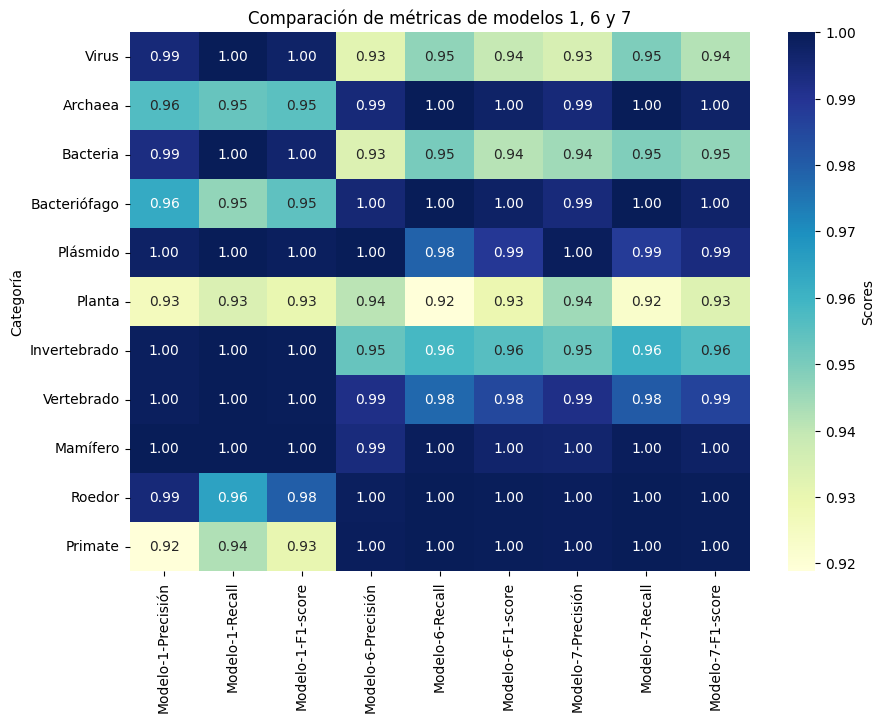

In [82]:
# Combine dataframes
combined_df = pd.concat([metrics_model_1_1.set_index('Categoría'), metrics_model_1_6.set_index('Categoría'),
                         metrics_model_1_7.set_index('Categoría')],
                         axis=1, keys=['Modelo-1', 'Modelo-6', 'Modelo-7'])

# Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(combined_df, annot=True, fmt='.2f', cmap="YlGnBu", cbar_kws={'label': 'Scores'})
plt.title('Comparación de métricas de modelos 1, 6 y 7')
plt.xlabel('')
plt.show()

Thus, finally, we have an optimized and computationally less expensive final model to use in the taxonomic group prediction problem from codon usage frequency.
The final model has the following characteristics:
1. Stratified K-fold as a dataset division method.
2. Random Forest model trained with principal components.
3. Hyperparameters: 'max_depth': 30, 'n_estimators': 200.

### Models with DNA source as the target variable

For the SVM-based model, the objective is to optimize the hyperparameters C and kernel, as they are more critical in this type of model.

### Model 7: Stratified K-fold + SVM trained with all variables + optimized hyperparameters

In [83]:
# Initialize StratifiedKFold
#skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# SVM model
#svm_model = SVC(random_state=42)

# Define the hyperparameters to be tested
param_grid = {
    'C': [0.1, 1, 10],  # Values to test
    'kernel': ['linear', 'rbf', 'poly'],  # Values to test
}

# Initialize GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=skf, scoring='accuracy')

# List to save accuracy
list_accuracy = []

# Lists for metrics by category
list_precision = []
list_recall = []
list_f1 = []

# Iterate over the training and test sets generated by StratifiedKFold
for train_index, test_index in skf.split(X_ros_adn, y_ros_adn):
    X_train, X_test = X_ros_adn.iloc[train_index], X_ros_adn.iloc[test_index]
    y_train, y_test = y_ros_adn.iloc[train_index], y_ros_adn.iloc[test_index]

    # Run GridSearchCV
    grid_search.fit(X_train, y_train)

    # Get the best model found by GridSearchCV
    best_model = grid_search.best_estimator_

    # Predictions
    y_test_pred = best_model.predict(X_test)

    # Calculate accuracies and save them in a list
    accuracy = accuracy_score(y_test, y_test_pred)
    list_accuracy.append(accuracy)

    # Calculate and save metrics by category
    precision = precision_score(y_test, y_test_pred, average=None)
    recall = recall_score(y_test, y_test_pred, average=None)
    f1 = f1_score(y_test, y_test_pred, average=None)

    list_precision.append(precision)
    list_recall.append(recall)
    list_f1.append(f1)

# Average accuracy
average_accuracy = np.mean(list_accuracy)
print('Exactitud promedio:', average_accuracy)

# Calculate average metrics by category
average_precision = np.mean(list_precision, axis=0)
average_recall = np.mean(list_recall, axis=0)
average_f1 = np.mean(list_f1, axis=0)

# Create a dataframe with the metrics by category
metrics_model_2_7 = pd.DataFrame({
    'Categoría': data['Tipo_ADN'].unique(),
    'Precisión': average_precision,
    'Recall': average_recall,
    'F1-score': average_f1
})

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Métricas por categoría:\n', metrics_model_2_7)

Exactitud promedio: 0.9992228818132757
Mejores hiperparámetros: {'C': 10, 'kernel': 'poly'}
Métricas por categoría:
                   Categoría  Precisión    Recall  F1-score
0                  Genómico   1.000000  1.000000  1.000000
1  Endosimbionte_secundario   0.999784  1.000000  0.999892
2                  Plástido   0.996985  0.998057  0.997519
3               Cloroplasto   1.000000  1.000000  1.000000
4              Mitocondrial   1.000000  1.000000  1.000000
5                   Cianelo   0.999675  0.994927  0.997294
6               Cromoplasto   0.999677  1.000000  0.999838
7               Nucleomorfo   0.998706  0.999245  0.998975
8               Apicoplasto   0.999892  1.000000  0.999946
9              Kinetoplasto   0.997526  1.000000  0.998761


The best combination of parameters was:

In [85]:
print("Mejores Parametros", grid_search.best_params_)

Mejores Parametros {'C': 10, 'kernel': 'poly'}


As in the previous problem, the metrics of the first proposed model (Model 1), the selected model (Model 6) and the selected model with optimized hyperparameters (Model 7) are compared.

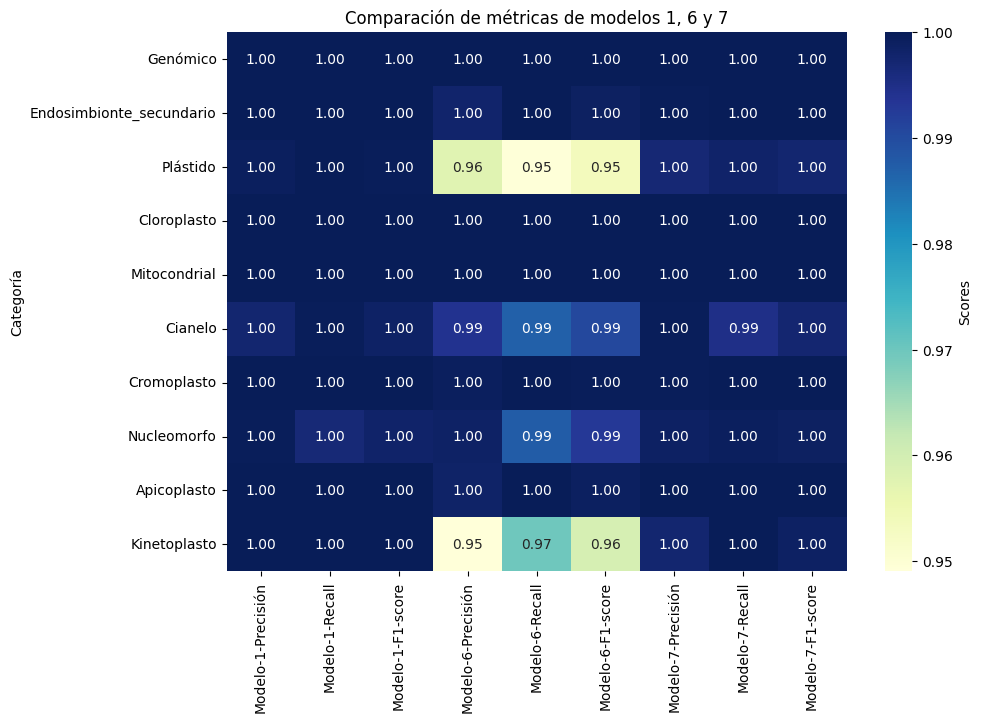

In [86]:
# Combine dataframes
combined_df = pd.concat([metrics_model_2_1.set_index('Categoría'), metrics_model_2_6.set_index('Categoría'),
                         metrics_model_2_7.set_index('Categoría')],
                         axis=1, keys=['Modelo-1', 'Modelo-6', 'Modelo-7'])

# Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(combined_df, annot=True, fmt='.2f', cmap="YlGnBu", cbar_kws={'label': 'Scores'})
plt.title('Comparación de métricas de modelos 1, 6 y 7')
plt.xlabel('')
plt.show()

The final optimized model for the problem of predicting DNA source from codon usage frequency has the following characteristics:
1. Stratified K-fold as a dataset splitting method.
2. SVM model trained with all variables.
3. Hyperparameters: 'C': 10, 'kernel': 'poly'.

# Final Conclusions

1. Initial EDA revealed that different codons provide unique information for classifying sequences into their taxonomic group and source DNA.
2. The two classification problems exhibited distinct complexities:
- For the taxonomic group classification problem, Random Forest models outperformed SVM models, showing an improvement of more than 10% in accuracy. Also, some taxonomic categories were observed to be easier to predict than others.
- For the source DNA classification problem, Random Forest models outperformed SVM models in performing certain categories, although a higher propensity for overfitting was observed. Source DNA prediction performance was much more consistent across categories.
3. Considering the performance evaluation of all models, it was decided to employ a Random Forest model with a reduced set of attributes to address the taxonomic group prediction problem. This contributed to the decrease in complexity and computational cost.
4. For the source DNA prediction problem, an SVM-based model using all variables was chosen, as it showed good performance and less overfitting.
5. The implementation of the Stratified-K fold method to split the datasets demonstrated excellent results in terms of performance and a lower propensity to overfitting compared to the original models.
6. The final optimized models allow predicting the taxonomic group and source DNA of a sequence with accuracies greater than 97%, per-category precisions equal to or greater than 93%, and sensitivities equal to or greater than 92%.

# Recommendations

- The models developed in this project show promise and their implementation is suggested for efficient classification of new sequences. However, it should be noted that these models were built from an artificially balanced dataset. Although from a technical perspective this approach is appropriate, it is crucial to note that the original dataset exhibits a significant imbalance, especially with regard to the type of DNA source, where more than 70% of the sequences are represented by genomic sequences.
- Therefore, it is recommended to increase the size of the original dataset, especially incorporating sequences from other sources to balance the remaining categories with additional biological information. The goal is to capture as much biological variability as possible. Secondly, it is suggested to balance the taxonomic categories.
- In addition, it is advised to improve the categories of the "taxonomic group" variable. This implies redefining the categories so that they have similar evolutionary distances, in order to reduce noise in the dataset. In the current dataset, species are classified according to various levels of taxonomic hierarchy without clear justification, which could affect the quality of the predictions.